# Predicting Corporate Distress for Small and Medium-sized Enterprises (SMEs) in Hong Kong, Singapore, and South Korea.

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import functools as ft

In [2]:
# Read in cleaned dataset
df_inputs = pd.read_excel('./files/df_inputs.xlsx')

<br>

# PART 6: Feature Engineering

In [3]:
# Print dataframe
df_inputs

country                industry       status  \
0      HONG KONG    Non-Energy Materials  nondistress   
1      HONG KONG              Technology  nondistress   
2      HONG KONG              Technology  nondistress   
3      HONG KONG             Industrials  nondistress   
4      HONG KONG  Consumer Non-Cyclicals  nondistress   
...          ...                     ...          ...   
11731  HONG KONG              Technology     distress   
11732  HONG KONG             Industrials     distress   
11733  HONG KONG       Consumer Services     distress   
11734  HONG KONG  Consumer Non-Cyclicals     distress   
11735  HONG KONG              Technology     distress   

       account_receivables_to_liabilities  accounts_payable_to_sales  \
0                                0.100113                   3.443699   
1                                0.469323                  10.024384   
2                                0.421605                  13.087082   
3                                0.113431                  21.357476   
4                                0.037818                   3.834794   
...                                   ...                        ...   
11731                            0.152489                  34.074801   
11732                            0.096692                   4.220428   
11733                            0.030439                   0.887185   
11734                            0.013969                  12.146177   
11735                            0.169106                  17.168492   

       asset_turnover  cash_conversion_cycle  cash_flow_to_sales  cash_ratio  \
0            2.025741              42.878173            0.030465    0.590973   
1            0.669363             346.751192            0.190047    0.524919   
2            0.364789              85.329838            0.154087    1.032610   
3            0.468111              65.084161            0.073650    0.484034   
4            1.713386              73.067234            0.116335    0.603271   
...               ...                    ...                 ...         ...   
11731        1.047268              10.843020            0.348402    0.429214   
11732        0.882942              35.875377           -0.121822    0.178393   
11733        0.086412             612.626813           -1.089482    0.364564   
11734        0.072270              92.537476           -1.135644   19.704130   
11735        0.546350             231.674914           -0.616809    0.986187   

       current_ratio  ...  market_capitalisation_to_debt  net_income_margin  \
0           1.229032  ...                       0.528091           1.017586   
1           3.019004  ...                       9.620964           4.947610   
2           2.263283  ...                     100.646798          15.227393   
3           1.017064  ...                       0.356653           1.062672   
4           1.872607  ...                       3.335079          -8.309576   
...              ...  ...                            ...                ...   
11731       0.754451  ...                      10.390359          -3.485639   
11732       0.430073  ...                       0.156799         -28.154668   
11733       1.347735  ...                       0.230885        -639.508144   
11734      20.536439  ...                       2.074112       -1867.586740   
11735       2.140177  ...                       4.035359        -224.754434   

       operating_margin  price_to_book  price_to_earnings  price_to_sales  \
0              1.601622       0.562446          13.454226        0.122151   
1              8.611094       3.801190          70.969013        3.148415   
2              0.746354       0.755246          11.004785        1.681744   
3             -3.197674       0.381114          24.893858        0.264508   
4             -6.430869       2.162323          17.425228        0.628243   
...                 ...            ...                ...             ...   
11731     

<h3> Encoding Target Variable </h3>

In [4]:
df_inputs_encode = df_inputs.copy()

# Rename column names
df_inputs_encode = df_inputs_encode.rename(columns={'status': 'distress'})

# Set encoding (distress: 1; nondistress: 0)
df_inputs_encode.loc[df_inputs_encode['distress'] == 'nondistress', 'distress'] = 0
df_inputs_encode.loc[df_inputs_encode['distress'] == 'distress', 'distress'] = 1

In [5]:
# Print dataframe
df_inputs_encode

country                industry distress  \
0      HONG KONG    Non-Energy Materials        0   
1      HONG KONG              Technology        0   
2      HONG KONG              Technology        0   
3      HONG KONG             Industrials        0   
4      HONG KONG  Consumer Non-Cyclicals        0   
...          ...                     ...      ...   
11731  HONG KONG              Technology        1   
11732  HONG KONG             Industrials        1   
11733  HONG KONG       Consumer Services        1   
11734  HONG KONG  Consumer Non-Cyclicals        1   
11735  HONG KONG              Technology        1   

       account_receivables_to_liabilities  accounts_payable_to_sales  \
0                                0.100113                   3.443699   
1                                0.469323                  10.024384   
2                                0.421605                  13.087082   
3                                0.113431                  21.357476   
4                                0.037818                   3.834794   
...                                   ...                        ...   
11731                            0.152489                  34.074801   
11732                            0.096692                   4.220428   
11733                            0.030439                   0.887185   
11734                            0.013969                  12.146177   
11735                            0.169106                  17.168492   

       asset_turnover  cash_conversion_cycle  cash_flow_to_sales  cash_ratio  \
0            2.025741              42.878173            0.030465    0.590973   
1            0.669363             346.751192            0.190047    0.524919   
2            0.364789              85.329838            0.154087    1.032610   
3            0.468111              65.084161            0.073650    0.484034   
4            1.713386              73.067234            0.116335    0.603271   
...               ...                    ...                 ...         ...   
11731        1.047268              10.843020            0.348402    0.429214   
11732        0.882942              35.875377           -0.121822    0.178393   
11733        0.086412             612.626813           -1.089482    0.364564   
11734        0.072270              92.537476           -1.135644   19.704130   
11735        0.546350             231.674914           -0.616809    0.986187   

       current_ratio  ...  market_capitalisation_to_debt  net_income_margin  \
0           1.229032  ...                       0.528091           1.017586   
1           3.019004  ...                       9.620964           4.947610   
2           2.263283  ...                     100.646798          15.227393   
3           1.017064  ...                       0.356653           1.062672   
4           1.872607  ...                       3.335079          -8.309576   
...              ...  ...                            ...                ...   
11731       0.754451  ...                      10.390359          -3.485639   
11732       0.430073  ...                       0.156799         -28.154668   
11733       1.347735  ...                       0.230885        -639.508144   
11734      20.536439  ...                       2.074112       -1867.586740   
11735       2.140177  ...                       4.035359        -224.754434   

       operating_margin  price_to_book  price_to_earnings  price_to_sales  \
0              1.601622       0.562446          13.454226        0.122151   
1              8.611094       3.801190          70.969013        3.148415   
2              0.746354       0.755246          11.004785        1.681744   
3             -3.197674       0.381114          24.893858        0.264508   
4             -6.430869       2.162323          17.425228        0.628243   
...                 ...            ...                ...             ...   
11731         12.188252       6.388780         185.929558 

<h3> Encoding Independent Variables </h3>

- Dummy encoding is performed for **categorical predictors** in our dataset
- Dummy encoding is the process of transforming categorical variables into a set of binary variables. 
- It uses k-1 features to represent k categories, to avoid dummy variable trap

In [6]:
# Check the labels in 'country' and 'industry' column before dummy encoding
print('{numboflabels} Labels in country column:'.format(numboflabels = len(df_inputs_encode['country'].unique())))
print(df_inputs_encode['country'].unique())

print('')
print('{numboflabels} Labels in industry column:'.format(numboflabels = len(df_inputs_encode['industry'].unique())))
print(df_inputs_encode['industry'].unique())

3 Labels in country column:
['HONG KONG' 'SOUTH KOREA' 'SINGAPORE']

11 Labels in industry column:
['Non-Energy Materials' 'Technology' 'Industrials'
 'Consumer Non-Cyclicals' 'Utilities' 'Consumer Cyclicals' 'Energy'
 'Telecommunications' 'Healthcare' 'Business Services' 'Consumer Services']


In [7]:
# Dummy encoding for 'country' and 'industry' columns into (k-1) variables
dummy_cols = ['country', 'industry']
df_inputs_encode = pd.get_dummies(df_inputs_encode, columns=dummy_cols, dtype=int)

In [8]:
# Drop columns to avoid dummy variable trap
# -- For country: Hong Kong is dropped
# -- For industry: Consumer Non-Cyclicals is dropped
df_inputs_encode = df_inputs_encode.drop(['country_HONG KONG','industry_Consumer Non-Cyclicals'], axis=1)

In [9]:
# Format column names
df_inputs_encode.columns = (df_inputs_encode.columns.str.strip().str.lower()
                            .str.replace(' ', '_', regex=False)
                            .str.replace('-', '_', regex=False))

In [10]:
# Check labels after dummy encoding
print('{numboflabels} Labels in country column:'.format(numboflabels = len(df_inputs_encode.filter(regex = 'country')
                                                                           .columns.tolist())))
print(df_inputs_encode.filter(regex = 'country').columns.tolist())

print('')
print('{numboflabels} Labels in industry column:'.format(numboflabels = len(df_inputs_encode.filter(regex = 'industry')
                                                                           .columns.tolist())))
print(df_inputs_encode.filter(regex = 'industry').columns.tolist())

2 Labels in country column:
['country_singapore', 'country_south_korea']

10 Labels in industry column:
['industry_business_services', 'industry_consumer_cyclicals', 'industry_consumer_services', 'industry_energy', 'industry_healthcare', 'industry_industrials', 'industry_non_energy_materials', 'industry_technology', 'industry_telecommunications', 'industry_utilities']


In [11]:
# Print dataframe
df_inputs_encode.head()

distress  account_receivables_to_liabilities  accounts_payable_to_sales  \
0        0                            0.100113                   3.443699   
1        0                            0.469323                  10.024384   
2        0                            0.421605                  13.087082   
3        0                            0.113431                  21.357476   
4        0                            0.037818                   3.834794   

   asset_turnover  cash_conversion_cycle  cash_flow_to_sales  cash_ratio  \
0        2.025741              42.878173            0.030465    0.590973   
1        0.669363             346.751192            0.190047    0.524919   
2        0.364789              85.329838            0.154087    1.032610   
3        0.468111              65.084161            0.073650    0.484034   
4        1.713386              73.067234            0.116335    0.603271   

   current_ratio  debt_to_asset  debt_to_ebitda  ...  \
0       1.229032       0.416391        9.056580  ...   
1       3.019004       0.220396        2.390995  ...   
2       2.263283       0.006356        0.247948  ...   
3       1.017064       0.373990       24.219644  ...   
4       1.872607       0.330275        2.210591  ...   

   industry_business_services  industry_consumer_cyclicals  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   industry_consumer_services  industry_energy  industry_healthcare  \
0                           0                0                    0   
1                           0                0                    0   
2                           0                0                    0   
3                           0                0                    0   
4                           0                0                    0   

   industry_industrials  industry_non_energy_materials  industry_technology  \
0                     0                              1                    0   
1                     0                              0                    1   
2                     0                              0                    1   
3                     1                              0                    0   
4                     0                              0                    0   

   industry_telecommunications  industry_utilities  
0                            0                   0  
1                            0                   0  
2                            0                   0  
3                            0                   0  
4                            0                   0  

[5 rows x 38 columns]

<h3> Split Data (Train-Test) </h3>

In [12]:
# Check shape of dataframe
df_inputs_encode.shape

(11736, 38)

In [13]:
from sklearn.model_selection import train_test_split

# Split dataset (70% Train; 30% Test)
train, test = train_test_split(df_inputs_encode, train_size = 0.7, test_size = 0.3, random_state = 0)

# Print shape of train and test set
print('Number of records train dataset: ', train.shape)
print('Number of records test dataset: ', test.shape)

Number of records train dataset:  (8215, 38)
Number of records test dataset:  (3521, 38)


<br>

# Part 7: Feature Scaling

<h3> Standardisation </h3>

In [14]:
# Identify numeric cols
numeric_cols = df_inputs.select_dtypes(include=np.number).columns.tolist()
# numeric_cols

In [15]:
# Scaling numeric data using Standardisation
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_scaled = train.copy()
train_scaled[numeric_cols] = scaler.fit_transform(train_scaled[numeric_cols])

test_scaled = test.copy()
test_scaled[numeric_cols] = scaler.transform(test_scaled[numeric_cols])

In [16]:
# Checking transformed features has a mean of 0
round(train_scaled[numeric_cols].mean().head())

account_receivables_to_liabilities   -0.0
accounts_payable_to_sales            -0.0
asset_turnover                       -0.0
cash_conversion_cycle                -0.0
cash_flow_to_sales                   -0.0
dtype: float64

In [17]:
# Checking transformed features has a standard deviation of 1
round(train_scaled[numeric_cols].std().head())

account_receivables_to_liabilities    1.0
accounts_payable_to_sales             1.0
asset_turnover                        1.0
cash_conversion_cycle                 1.0
cash_flow_to_sales                    1.0
dtype: float64

<h3> Checking Coerrelation Coefficient </h3>

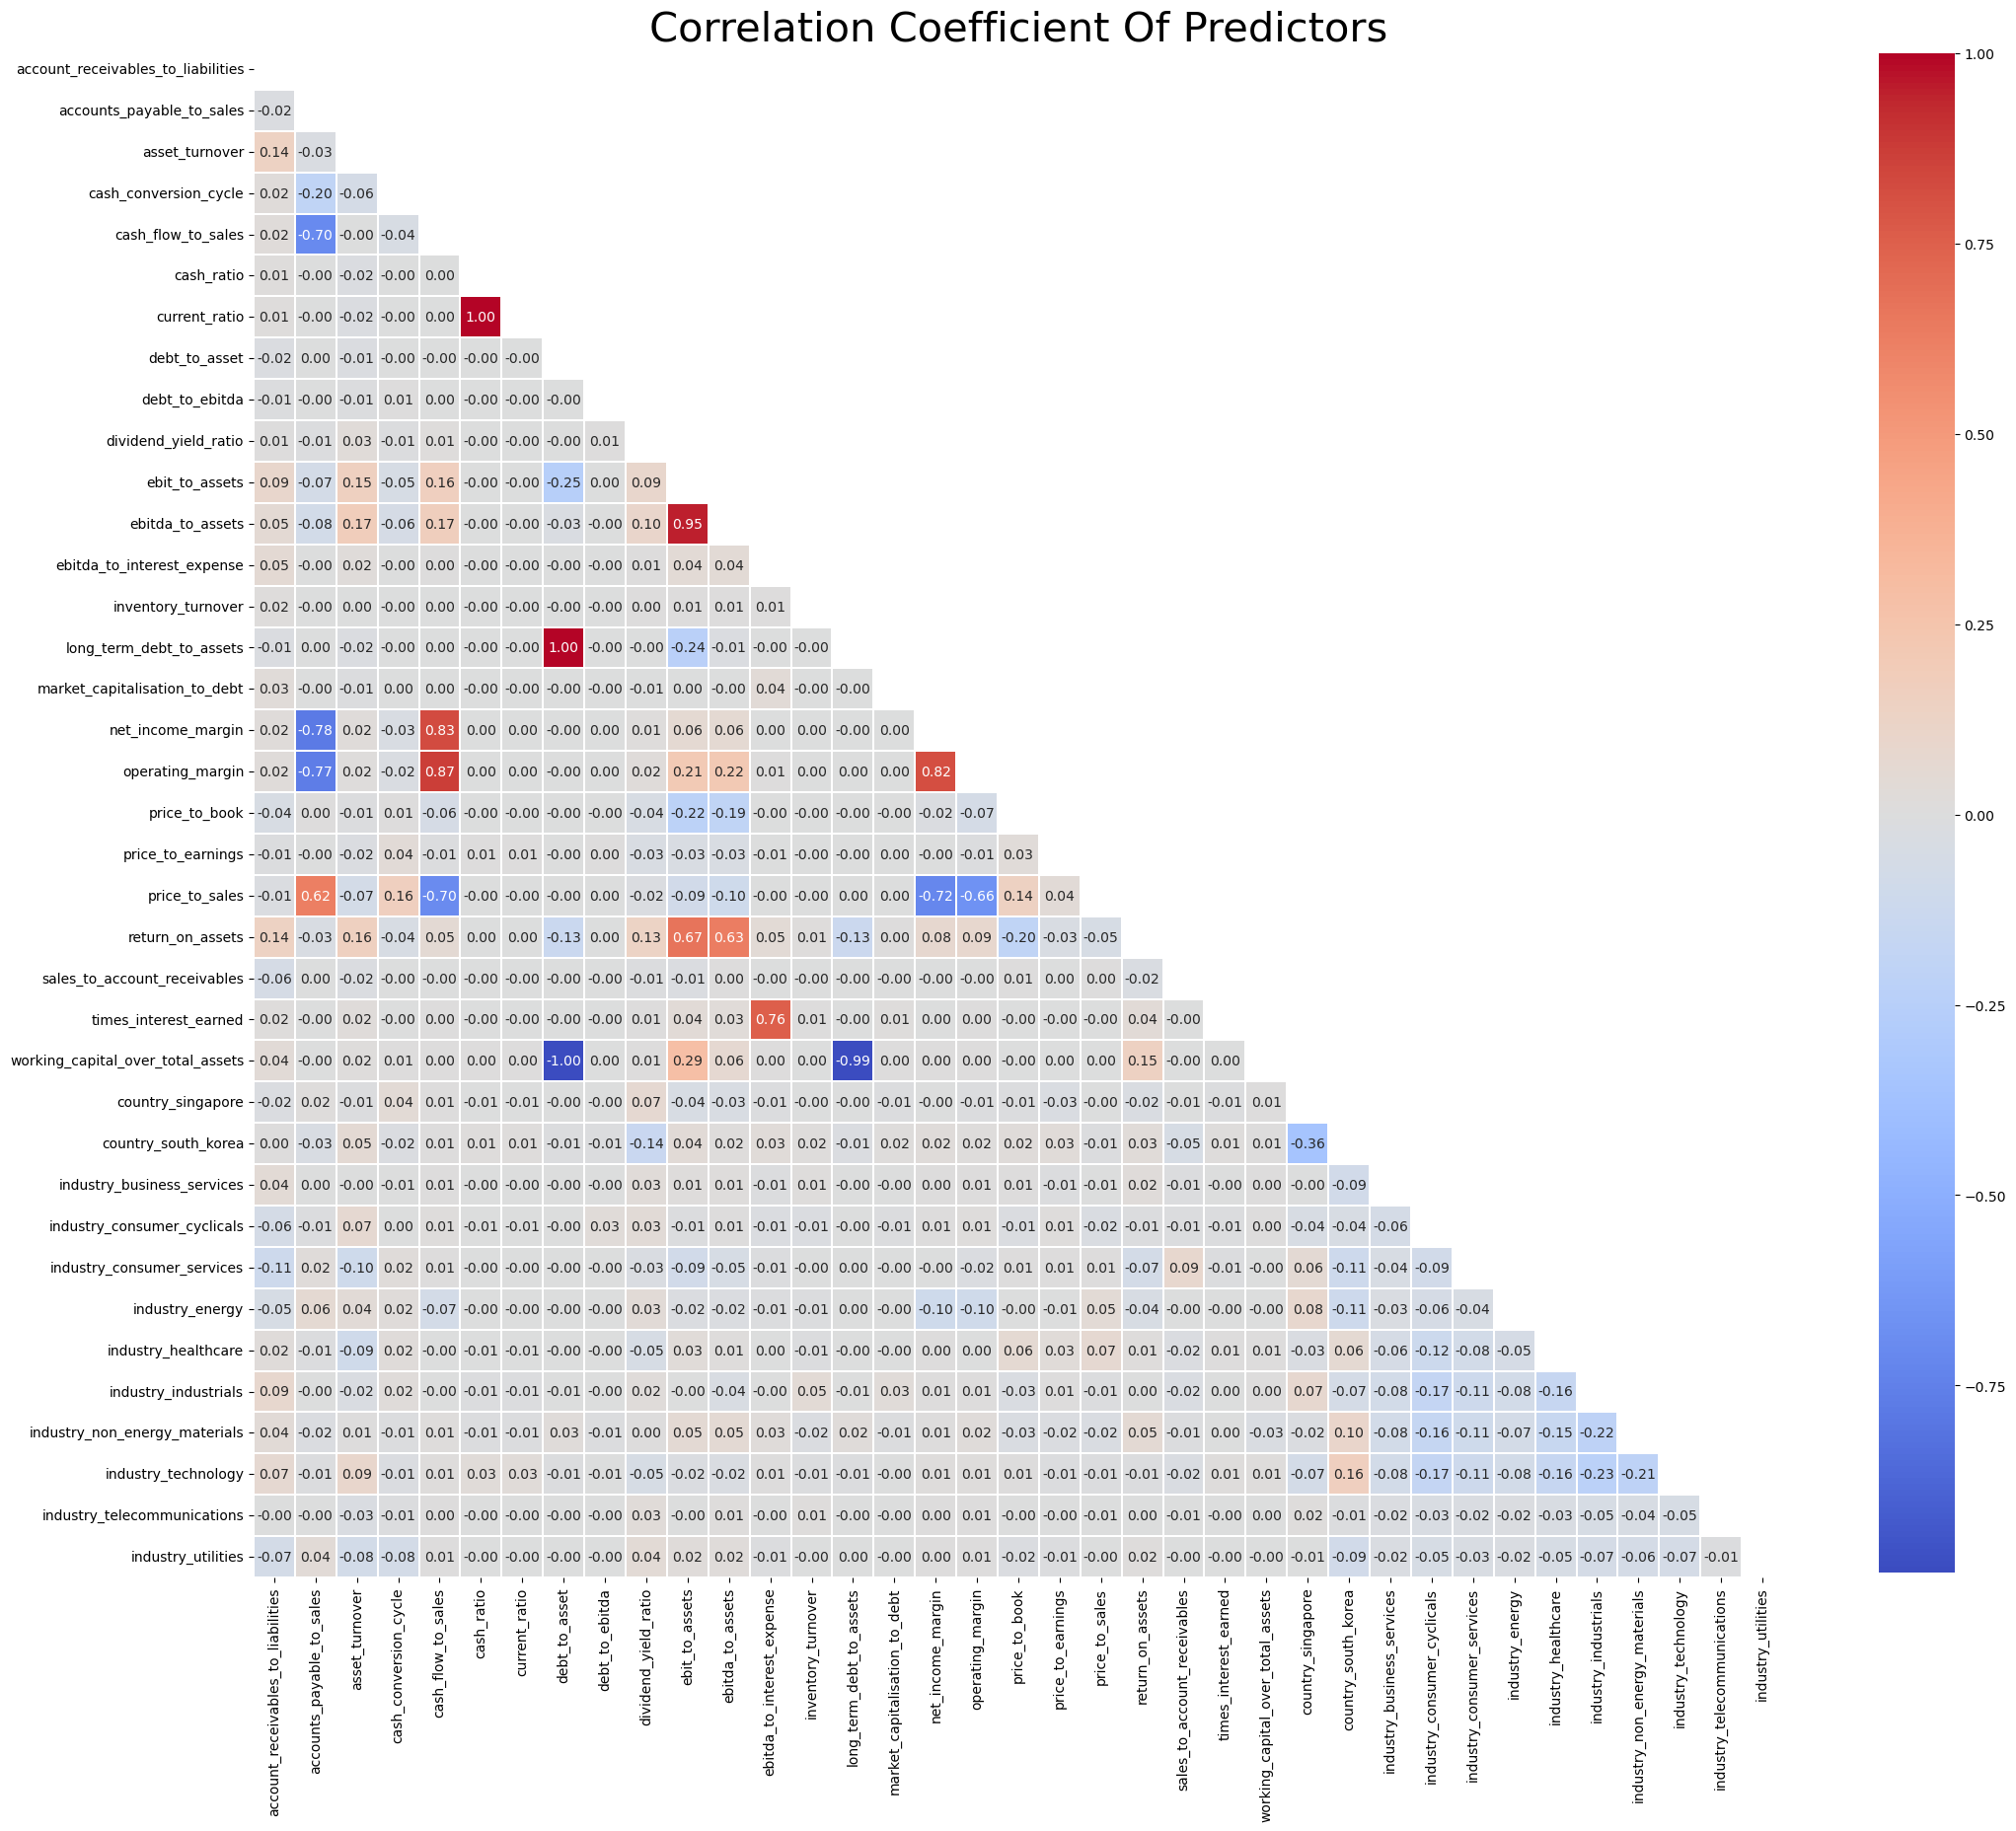

In [18]:
# Create collinearity matrix

# Set figure size
plt.figure(figsize=(25,25))

# Compute correlation coefficient values for each pair of features
correlation_matrix = train_scaled.corr(method='pearson')

# Generating a mask to only show the bottom triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Generate heatmap
sns.heatmap(correlation_matrix, center=0, cmap="coolwarm", square=True, linewidth=0.3, cbar_kws={"shrink": .8}, 
            annot=True, mask=mask, fmt='.2f')
plt.title('Correlation Coefficient Of Predictors', fontsize = 30)
plt.savefig('./files/images/correlationplots/initial_correlationplot.png', dpi=300, bbox_inches='tight', facecolor='w') # Save figure
plt.show()

In [19]:
# Create a dictionary
correlation_dict = {'correlated_features': [],
                    'correlation_score': []}

In [20]:
# Append correlated variables into dictionary
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if correlation_matrix.iloc[i, j] > 0.5: # Select only correlation_score more than 0.5
            corrfeatures = correlation_matrix.columns[i] + ' and ' + correlation_matrix.columns[j]
            corrscore = correlation_matrix.iloc[i, j].round(2)
            correlation_dict['correlated_features'].append(corrfeatures)
            correlation_dict['correlation_score'].append(corrscore)

In [21]:
# Convert dictionary to dataframe, sort values and reset index
correlated_features = pd.DataFrame(correlation_dict).sort_values(by=['correlation_score'], ascending=False).reset_index(drop=True)
correlated_features

correlated_features  correlation_score
0                       current_ratio and cash_ratio               1.00
1         long_term_debt_to_assets and debt_to_asset               1.00
2                ebitda_to_assets and ebit_to_assets               0.95
3            operating_margin and cash_flow_to_sales               0.87
4           net_income_margin and cash_flow_to_sales               0.83
5             operating_margin and net_income_margin               0.82
6  times_interest_earned and ebitda_to_interest_e...               0.76
7                return_on_assets and ebit_to_assets               0.67
8              return_on_assets and ebitda_to_assets               0.63
9       price_to_sales and accounts_payable_to_sales               0.62

**Correlation coefficient scale:**
- +1: Highly correlated in positive direction
- -1: Highly correlated in negative direction
- 0: No correlation

<br>

# Part 8: Feature Selection

<h3> Dividing Train Set into X and Y for model building </h3>

In [22]:
# Define input (X) and target (y) variables
y_train = train_scaled[['distress']] # Target column
X_train = train_scaled.loc[:,'account_receivables_to_liabilities':] # Independent columns

y_train = y_train.astype('int')

<h3> Dividing Test Set into X and Y for validation </h3>

In [23]:
# Define input (X) and target (y) variables
y_test = test_scaled[['distress']] # Target column
X_test = test_scaled.loc[:,'account_receivables_to_liabilities':] # Independent columns

y_test = y_test.astype('int')

## 8A) Variance Inflation Factor (VIF) - Handling Multicollinearity

- Features with a **VIF > 5 (i.e., equivalent to collinearity of 80%) are removed** in a stepwise manner
- Only remove **positively collinear features**

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [25]:
# Creating a function to calculate VIF
def compute_vif(X_VIF):

    # Add constant
    X_VIF = add_constant(X_VIF)
    
    # Create dataframe to store vif values
    vif_data = pd.DataFrame()
    vif_data["Features"] = X_VIF.columns
    
    # Calculating VIF for each feature 
    vif_data["VIF Scores"] = [variance_inflation_factor(X_VIF.values, i) for i in range(len(X_VIF.columns))]

    # Print dataframe
    vif_data = vif_data.sort_values('VIF Scores', ascending=False)
    vif_data['VIF Scores'] = vif_data['VIF Scores'].apply(lambda x: '{:.2f}'.format(x))
    vif_data

    # Remove constant
    vif_data = vif_data[vif_data['Features']!='const']
    return vif_data

In [26]:
X_VIF = X_train

# Compute VIF for all features 
compute_vif(X_VIF)

Features      VIF Scores
6                           cash_ratio  75605614306.08
7                        current_ratio  75605614306.08
8                        debt_to_asset         6489.32
15            long_term_debt_to_assets         3964.14
25   working_capital_over_total_assets          454.98
11                      ebit_to_assets           26.21
12                    ebitda_to_assets           22.48
18                    operating_margin            5.72
17                   net_income_margin            5.45
5                   cash_flow_to_sales            5.36
2            accounts_payable_to_sales            3.70
21                      price_to_sales            2.54
13          ebitda_to_interest_expense            2.36
24               times_interest_earned            2.35
35                 industry_technology            2.30
33                industry_industrials            2.30
34       industry_non_energy_materials            2.17
22                    return_on_assets            2.09
29         industry_consumer_cyclicals            1.86
32                 industry_healthcare            1.79
1   account_receivables_to_liabilities            1.58
30          industry_consumer_services            1.48
4                cash_conversion_cycle            1.29
27                 country_south_korea            1.27
28          industry_business_services            1.25
31                     industry_energy            1.24
37                  industry_utilities            1.20
26                   country_singapore            1.17
3                       asset_turnover            1.15
19                       price_to_book            1.13
36         industry_telecommunications            1.09
10                dividend_yield_ratio            1.05
23        sales_to_account_receivables            1.02
20                   price_to_earnings            1.01
14                  inventory_turnover            1.00
16       market_capitalisation_to_debt            1.00
9                       debt_to_ebitda            1.00

In [27]:
import dataframe_image as dfi
dfi.export(compute_vif(X_VIF), './files/images/tables/vif_start.png', max_rows=18, max_cols=7)

In [28]:
selected_features = X_VIF.columns.tolist()

# Remove either 'cash_ratio' or 'current ratio' as they are correlated (based from the correlation matrix)
# Remove 'cash_ratio' as it has the highest VIF score 
selected_features.remove('cash_ratio')

# Recalculate VIF using remaining features
X_VIF = X_VIF.loc[:, selected_features]
compute_vif(X_VIF)

Features VIF Scores
7                        debt_to_asset    6458.17
14            long_term_debt_to_assets    3954.19
24   working_capital_over_total_assets     449.13
10                      ebit_to_assets      26.18
11                    ebitda_to_assets      22.45
17                    operating_margin       5.72
5                   cash_flow_to_sales       5.32
16                   net_income_margin       5.30
2            accounts_payable_to_sales       3.69
20                      price_to_sales       2.54
12          ebitda_to_interest_expense       2.36
23               times_interest_earned       2.35
34                 industry_technology       2.30
32                industry_industrials       2.29
33       industry_non_energy_materials       2.17
21                    return_on_assets       2.09
28         industry_consumer_cyclicals       1.86
31                 industry_healthcare       1.79
29          industry_consumer_services       1.48
4                cash_conversion_cycle       1.29
26                 country_south_korea       1.27
1   account_receivables_to_liabilities       1.26
27          industry_business_services       1.24
30                     industry_energy       1.24
36                  industry_utilities       1.20
25                   country_singapore       1.17
3                       asset_turnover       1.14
18                       price_to_book       1.13
35         industry_telecommunications       1.09
9                 dividend_yield_ratio       1.05
22        sales_to_account_receivables       1.02
19                   price_to_earnings       1.01
13                  inventory_turnover       1.00
15       market_capitalisation_to_debt       1.00
6                        current_ratio       1.00
8                       debt_to_ebitda       1.00

In [29]:
# Remove either 'debt_to_asset' or 'long_term_debt_to_assets' as they are correlated (based from the correlation matrix)
# Remove 'long_term_debt_to_assets' as it possesses low predictive power (based from the univariate analysis)
selected_features.remove('long_term_debt_to_assets')

# Recalculate VIF using remaining features
X_VIF = X_VIF.loc[:, selected_features]
compute_vif(X_VIF)

Features VIF Scores
23   working_capital_over_total_assets     174.92
7                        debt_to_asset     170.74
10                      ebit_to_assets      26.13
11                    ebitda_to_assets      22.34
16                    operating_margin       5.72
5                   cash_flow_to_sales       5.32
15                   net_income_margin       5.30
2            accounts_payable_to_sales       3.69
19                      price_to_sales       2.53
12          ebitda_to_interest_expense       2.36
22               times_interest_earned       2.35
31                industry_industrials       2.29
33                 industry_technology       2.28
32       industry_non_energy_materials       2.16
20                    return_on_assets       2.09
27         industry_consumer_cyclicals       1.85
30                 industry_healthcare       1.79
28          industry_consumer_services       1.47
4                cash_conversion_cycle       1.29
25                 country_south_korea       1.26
26          industry_business_services       1.24
29                     industry_energy       1.23
1   account_receivables_to_liabilities       1.19
35                  industry_utilities       1.18
24                   country_singapore       1.17
3                       asset_turnover       1.13
17                       price_to_book       1.13
34         industry_telecommunications       1.08
9                 dividend_yield_ratio       1.05
21        sales_to_account_receivables       1.02
18                   price_to_earnings       1.01
14       market_capitalisation_to_debt       1.00
13                  inventory_turnover       1.00
6                        current_ratio       1.00
8                       debt_to_ebitda       1.00

In [30]:
# VIF accounts for negative correlations since it considers the R2
# Hence, we will not remove 'working_capital_over_total_assets' or 'debt_to_asset' even though they have high VIF scores 
# because they are negatively correlated (-1) (based from the correlation matrix)

In [31]:
# Remove either 'ebit_to_assets' or 'ebitda_to_assets' as they are correlated (based from the correlation matrix)
# Remove 'ebit_to_assets' as it has the highest VIF score 
selected_features.remove('ebit_to_assets')

# Recalculate VIF using remaining features
X_VIF = X_VIF.loc[:, selected_features]
compute_vif(X_VIF)

Features VIF Scores
22   working_capital_over_total_assets     169.22
7                        debt_to_asset     169.12
15                    operating_margin       5.69
5                   cash_flow_to_sales       5.31
14                   net_income_margin       5.28
2            accounts_payable_to_sales       3.68
18                      price_to_sales       2.53
10                    ebitda_to_assets       2.51
11          ebitda_to_interest_expense       2.36
21               times_interest_earned       2.35
32                 industry_technology       2.28
30                industry_industrials       2.27
31       industry_non_energy_materials       2.16
19                    return_on_assets       1.96
26         industry_consumer_cyclicals       1.85
29                 industry_healthcare       1.78
27          industry_consumer_services       1.45
4                cash_conversion_cycle       1.29
24                 country_south_korea       1.26
25          industry_business_services       1.24
28                     industry_energy       1.23
1   account_receivables_to_liabilities       1.19
34                  industry_utilities       1.18
23                   country_singapore       1.17
3                       asset_turnover       1.12
16                       price_to_book       1.10
33         industry_telecommunications       1.08
9                 dividend_yield_ratio       1.05
20        sales_to_account_receivables       1.02
17                   price_to_earnings       1.01
13       market_capitalisation_to_debt       1.00
12                  inventory_turnover       1.00
6                        current_ratio       1.00
8                       debt_to_ebitda       1.00

In [32]:
# Remove either 'operating_margin' or 'cash_flow_to_sales' as they are correlated (based from the correlation matrix)
# Remove 'operating_margin' as it has the highest VIF score 
selected_features.remove('operating_margin')

# Recalculate VIF using remaining features
X_VIF = X_VIF.loc[:, selected_features]
compute_vif(X_VIF)

Features VIF Scores
21   working_capital_over_total_assets     167.49
7                        debt_to_asset     167.39
14                   net_income_margin       5.09
5                   cash_flow_to_sales       3.81
2            accounts_payable_to_sales       3.24
17                      price_to_sales       2.53
10                    ebitda_to_assets       2.38
11          ebitda_to_interest_expense       2.36
20               times_interest_earned       2.35
31                 industry_technology       2.28
29                industry_industrials       2.27
30       industry_non_energy_materials       2.16
18                    return_on_assets       1.94
25         industry_consumer_cyclicals       1.85
28                 industry_healthcare       1.78
26          industry_consumer_services       1.45
4                cash_conversion_cycle       1.27
23                 country_south_korea       1.26
24          industry_business_services       1.24
27                     industry_energy       1.23
1   account_receivables_to_liabilities       1.19
33                  industry_utilities       1.18
22                   country_singapore       1.17
3                       asset_turnover       1.12
15                       price_to_book       1.10
32         industry_telecommunications       1.08
9                 dividend_yield_ratio       1.05
19        sales_to_account_receivables       1.02
16                   price_to_earnings       1.01
13       market_capitalisation_to_debt       1.00
12                  inventory_turnover       1.00
6                        current_ratio       1.00
8                       debt_to_ebitda       1.00

In [33]:
# Remove either 'net_income_margin' or 'cash_flow_to_sales' as they are correlated (based from the correlation matrix)
# Remove 'net_income_margin' as it has the highest VIF score
selected_features.remove('net_income_margin')

# Recalculate VIF using remaining features
X_VIF = X_VIF.loc[:, selected_features]
compute_vif(X_VIF)

# All features now have a VIF score less than 5 (Except 'working_capital_over_total_assets' and 'debt_to_asset')

Features VIF Scores
20   working_capital_over_total_assets     164.79
7                        debt_to_asset     164.62
5                   cash_flow_to_sales       2.66
2            accounts_payable_to_sales       2.55
16                      price_to_sales       2.40
11          ebitda_to_interest_expense       2.36
19               times_interest_earned       2.35
30                 industry_technology       2.28
28                industry_industrials       2.27
10                    ebitda_to_assets       2.22
29       industry_non_energy_materials       2.16
24         industry_consumer_cyclicals       1.85
17                    return_on_assets       1.84
27                 industry_healthcare       1.78
25          industry_consumer_services       1.45
22                 country_south_korea       1.26
4                cash_conversion_cycle       1.25
23          industry_business_services       1.24
26                     industry_energy       1.22
1   account_receivables_to_liabilities       1.18
32                  industry_utilities       1.18
21                   country_singapore       1.17
3                       asset_turnover       1.12
14                       price_to_book       1.10
31         industry_telecommunications       1.08
9                 dividend_yield_ratio       1.05
18        sales_to_account_receivables       1.02
15                   price_to_earnings       1.01
13       market_capitalisation_to_debt       1.00
12                  inventory_turnover       1.00
6                        current_ratio       1.00
8                       debt_to_ebitda       1.00

In [34]:
import dataframe_image as dfi
dfi.export(compute_vif(X_VIF), './files/images/tables/vif_end.png', max_rows=18, max_cols=7)

In [35]:
# Removed 5 features in VIF feature selection
print('Number of features at the start:', X_train.shape[1])
print('Number of features after VIF', len(selected_features))

Number of features at the start: 37
Number of features after VIF 32


In [36]:
# Define input variables after VIF Feature Selection
X_train_aftervif = X_train.loc[:,selected_features]
X_train_aftervif

account_receivables_to_liabilities  accounts_payable_to_sales  \
3378                            -0.284758                  -0.003685   
8160                            -0.298552                  -0.031642   
8506                            -0.221206                   0.122723   
185                             -0.886386                  -0.090162   
6307                            -0.176024                  -0.061137   
...                                   ...                        ...   
4859                            -0.264449                   0.078851   
3264                            -0.768971                  -0.004404   
9845                            -0.384240                  -0.040697   
10799                            0.706896                  -0.077722   
2732                            -0.697749                  -0.073605   

       asset_turnover  cash_conversion_cycle  cash_flow_to_sales  \
3378         0.139395              -0.030015            0.036661   
8160        -0.006804              -0.055076            0.017333   
8506        -0.946155              -0.064733            0.028366   
185         -1.032946              -0.123185            0.000985   
6307        -0.574002              -0.014410            0.060541   
...               ...                    ...                 ...   
4859         0.089081              -0.113384            0.037305   
3264        -0.753793               0.252613            0.045153   
9845         1.302271               0.012715            0.029462   
10799       -0.533632               0.056133            0.054495   
2732        -0.601525              -0.156749            0.063605   

       current_ratio  debt_to_asset  debt_to_ebitda  dividend_yield_ratio  \
3378       -0.015610       0.006586       -0.009878             -0.317478   
8160       -0.015610      -0.009819       -0.009198              0.022734   
8506       -0.015610      -0.013695       -0.008254             -0.139682   
185        -0.015607      -0.005720        0.006935             -0.317478   
6307       -0.015604      -0.023517       -0.011220             -0.252585   
...              ...            ...             ...                   ...   
4859       -0.015610      -0.011530       -0.010789             -0.317478   
3264       -0.015608       0.013589       -0.008238             -0.317478   
9845       -0.015607      -0.015004       -0.011040             -0.317478   
10799      -0.015605      -0.022492       -0.011278              1.876842   
2732       -0.015603      -0.032681       -0.011553              0.191405   

       ebitda_to_assets  ...  industry_business_services  \
3378           0.206434  ...                           0   
8160          -0.059674  ...                           0   
8506          -0.137976  ...                           0   
185           -0.226126  ...                           0   
6307           0.290436  ...                           0   
...                 ...  ...                         ...   
4859           0.290126  ...                           0   
3264           0.020985  ...                           0   
9845           0.415715  ...                           0   
10799          0.459816  ...                           0   
2732           0.374789  ...                           0   

       industry_consumer_cyclicals  industry_consumer_services  \
3378                             0                           0   
8160                             0                           0   
8506                             0                           0   
185                              1                           0   
6307                             0                           0   
...                            ...                         ...   
4859                             0                           0   
3264                             0                           0   
9845                             1                           0   
10799              

In [37]:
# Reorder columns in dataframe and use seed to make results reproducible
viforder = np.random.default_rng(seed=10).permutation(X_train_aftervif.columns.values).tolist()
X_train_aftervif = X_train_aftervif[viforder]
# X_train_aftervif

## 8B) Recursive Feature Elimination with Cross-Validation (RFECV)

- Aims to find the best performing subset of features
- Repeatedly creates models and remove the least important features at each iteration
- Uses cross-validation to identify the optimal number of features

- Learning Estimator: Random Forest Classifier 
- Metric used: 'Accuracy'

In [38]:
# Tested RFECV with different base algorithm models (Tested xgboost, DecisionTreeClassifier, ExtraTreesClassifier, 
# AdaBoostClassifier, RandomForestClassifier, and GradientBoostingClassifier)
# Best model: RandomForestClassifier

<h3> RandomForestClassifier </h3>

In [39]:
# Algorithm takes around 30mins to complete.
# Output of the RandomForestClassifier is stored in the variables in the subsequent cell.
# Run the script in the cell below instead of this one to save time.
# ================================================================

# Run RFECV to get the top features
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

print("Feature data dimension: ", X_train_aftervif.shape)

estimator = RandomForestClassifier(random_state=101) # Set random state to make the results reproducible
# Running RFECV with cross-validation of 10 folds and optimising 'accuracy' as the metric
rfecv = RFECV(estimator=estimator, step=1, cv=StratifiedKFold(n_splits=10), scoring='accuracy')
rfecv.fit(X_train_aftervif, y_train.values.ravel())

selectedfeatures_randomforest = list(X_train_aftervif.columns[rfecv.support_])
support_randomforest = list(rfecv.support_)
ranking_randomforest = list(rfecv.ranking_)
results_randomforest = rfecv.cv_results_
featureimportance_randomforest = rfecv.estimator_.feature_importances_

features = np.array(X_train_aftervif.columns)
print("All features:")
print(features)
print('')

print('Optimal number of features: {}'.format(rfecv.n_features_))
print('Selected features:')
print(selectedfeatures_randomforest)

Feature data dimension:  (8215, 32)
All features:
['country_singapore' 'current_ratio' 'times_interest_earned'
 'ebitda_to_assets' 'industry_industrials' 'industry_consumer_cyclicals'
 'price_to_sales' 'industry_technology' 'debt_to_ebitda'
 'sales_to_account_receivables' 'industry_energy'
 'industry_telecommunications' 'debt_to_asset' 'accounts_payable_to_sales'
 'cash_flow_to_sales' 'industry_utilities' 'inventory_turnover'
 'cash_conversion_cycle' 'ebitda_to_interest_expense'
 'industry_non_energy_materials' 'price_to_earnings'
 'working_capital_over_total_assets' 'return_on_assets' 'asset_turnover'
 'market_capitalisation_to_debt' 'industry_healthcare'
 'dividend_yield_ratio' 'country_south_korea' 'industry_business_services'
 'account_receivables_to_liabilities' 'price_to_book'
 'industry_consumer_services']

Optimal number of features: 22
Selected features:
['current_ratio', 'times_interest_earned', 'ebitda_to_assets', 'price_to_sales', 'debt_to_ebitda', 'sales_to_account_receiva

In [40]:
# Output of the RandomForestClassifier
selectedfeatures_randomforest = ['current_ratio', 'times_interest_earned', 'ebitda_to_assets', 'price_to_sales', 
                                 'debt_to_ebitda', 'sales_to_account_receivables', 'industry_energy', 'debt_to_asset', 
                                 'accounts_payable_to_sales', 'cash_flow_to_sales', 'inventory_turnover', 
                                 'cash_conversion_cycle', 'ebitda_to_interest_expense', 'price_to_earnings', 
                                 'working_capital_over_total_assets', 'return_on_assets', 'asset_turnover', 
                                 'market_capitalisation_to_debt', 'dividend_yield_ratio', 'country_south_korea', 
                                 'account_receivables_to_liabilities', 'price_to_book']

support_randomforest = [False, True, True, True, False, False, True, False, True, True, True, False, True, True, True, False,
                        True, True, True, False, True, True, True, True, True, False, True, True, False, True, True, False]

ranking_randomforest = [5, 1, 1, 1, 4, 2, 1, 3, 1, 1, 1, 11, 1, 1, 1, 10, 1, 1, 1, 7, 1, 1, 1, 1, 1, 6, 1, 1, 9, 1, 1, 8]

results_randomforest = {
    'mean_test_score': np.array([0.92440855, 0.95508282, 0.9589765 , 0.95909801, 0.96189873,
        0.96214189, 0.96202112, 0.96275075, 0.96323767, 0.96384579,
        0.96433271, 0.96506278, 0.96506264, 0.96676713, 0.96652412,
        0.96555029, 0.96627977, 0.96615916, 0.96652397, 0.96591525,
        0.96676698, 0.967376  , 0.96603691, 0.96640246, 0.96652353,
        0.96713269, 0.96701118, 0.9660372 , 0.96725464, 0.96676743,
        0.96725449, 0.96579375]),
 'std_test_score': np.array([0.00592467, 0.00353861, 0.00299852, 0.00324436, 0.00435978,
        0.00413182, 0.00296649, 0.00358081, 0.00360474, 0.003702  ,
        0.00250909, 0.00358182, 0.00436659, 0.00318582, 0.00314365,
        0.00414983, 0.00408675, 0.00302347, 0.00304919, 0.00411456,
        0.00353941, 0.00384634, 0.00371587, 0.00304418, 0.0033327 ,
        0.00272816, 0.00398206, 0.00315258, 0.00319796, 0.00327459,
        0.00319932, 0.00401993]),
 'split0_test_score': np.array([0.91970803, 0.9513382 , 0.96107056, 0.95985401, 0.96107056,
        0.96472019, 0.96107056, 0.95985401, 0.9622871 , 0.96350365,
        0.96350365, 0.96593674, 0.96350365, 0.96593674, 0.96472019,
        0.9622871 , 0.96593674, 0.96472019, 0.96715328, 0.96472019,
        0.96715328, 0.96593674, 0.96593674, 0.96472019, 0.96593674,
        0.96715328, 0.96593674, 0.96593674, 0.96593674, 0.96593674,
        0.96593674, 0.96593674]),
 'split1_test_score': np.array([0.92214112, 0.95863747, 0.95985401, 0.95863747, 0.96350365,
        0.96593674, 0.96472019, 0.96593674, 0.96958637, 0.96958637,
        0.96958637, 0.97201946, 0.97201946, 0.97323601, 0.97445255,
        0.97445255, 0.97445255, 0.96958637, 0.97201946, 0.97445255,
        0.97445255, 0.9756691 , 0.97323601, 0.97201946, 0.97080292,
        0.97201946, 0.97323601, 0.97323601, 0.97201946, 0.97445255,
        0.97201946, 0.97323601]),
 'split2_test_score': np.array([0.91970803, 0.95742092, 0.96107056, 0.95985401, 0.95620438,
        0.95742092, 0.95985401, 0.96107056, 0.95863747, 0.9622871 ,
        0.96472019, 0.9622871 , 0.96593674, 0.96472019, 0.96472019,
        0.96107056, 0.96472019, 0.96107056, 0.9622871 , 0.96350365,
        0.96593674, 0.96472019, 0.96593674, 0.96472019, 0.96472019,
        0.96472019, 0.9622871 , 0.96472019, 0.96472019, 0.96472019,
        0.96715328, 0.96472019]),
 'split3_test_score': np.array([0.92944039, 0.9513382 , 0.95863747, 0.95985401, 0.96593674,
        0.96593674, 0.96350365, 0.96958637, 0.96836983, 0.96958637,
        0.96715328, 0.97080292, 0.97201946, 0.97201946, 0.96836983,
        0.97201946, 0.97201946, 0.97201946, 0.97201946, 0.97201946,
        0.97201946, 0.97323601, 0.97201946, 0.97201946, 0.97445255,
        0.97201946, 0.97323601, 0.96958637, 0.97323601, 0.96958637,
        0.97323601, 0.97080292]),
 'split4_test_score': np.array([0.91484185, 0.9513382 , 0.9622871 , 0.96715328, 0.96472019,
        0.96107056, 0.95742092, 0.95985401, 0.95985401, 0.96107056,
        0.96350365, 0.96350365, 0.9622871 , 0.96593674, 0.96472019,
        0.9622871 , 0.96593674, 0.96593674, 0.96472019, 0.96107056,
        0.96350365, 0.96350365, 0.95985401, 0.9622871 , 0.96593674,
        0.96472019, 0.96350365, 0.96107056, 0.96350365, 0.96472019,
        0.9622871 , 0.95863747]),
 'split5_test_score': np.array([0.93057247, 0.95371498, 0.95493301, 0.95736906, 0.9634592 ,
        0.96102314, 0.96589525, 0.96467722, 0.9634592 , 0.96467722,
        0.96224117, 0.96102314, 0.96224117, 0.96467722, 0.9634592 ,
        0.9634592 , 0.96102314, 0.96711328, 0.96467722, 0.96224117,
        0.96711328, 0.96589525, 0.9634592 , 0.96467722, 0.96467722,
        0.96589525, 0.96102314, 0.96467722, 0.96589525, 0.96589525,
        0.9683313 , 0.96224117]),
 'split6_test_score': np.array([0.93300853, 0.96102314, 0.95858709, 0.95980512, 0.95980512,
        0.96224117, 0.96102314, 0.96467722, 0.9634592 , 0.9634592 ,
        0.96467722, 0.96467722, 0.9634592 , 0.96711328, 0.9634592 ,
        0.96467722, 0.9683313 , 0.96589525, 0.96467722, 0.96711328,
        0.96467722, 0.9683313 , 0.96589525, 0.96467722, 0.96589525,
        0.96711328, 0.96711328, 0.96589525, 0.96954933, 0.96589525,
        0.96589525, 0.96711328]),
 'split7_test_score': np.array([0.92204629, 0.95127893, 0.9634592 , 0.95858709, 0.96467722,
        0.9683313 , 0.96467722, 0.9634592 , 0.96589525, 0.9634592 ,
        0.96467722, 0.96589525, 0.9683313 , 0.96589525, 0.96711328,
        0.96589525, 0.96467722, 0.96711328, 0.96711328, 0.96711328,
        0.96589525, 0.96711328, 0.96467722, 0.96711328, 0.96589525,
        0.96711328, 0.96589525, 0.96589525, 0.96711328, 0.96954933,
        0.96467722, 0.96589525]),
 'split8_test_score': np.array([0.9317905 , 0.95615104, 0.95493301, 0.95493301, 0.96711328,
        0.96102314, 0.96467722, 0.96224117, 0.96224117, 0.96467722,
        0.9634592 , 0.9634592 , 0.9634592 , 0.96589525, 0.96589525,
        0.96589525, 0.96102314, 0.96224117, 0.96467722, 0.9634592 ,
        0.9634592 , 0.9634592 , 0.96467722, 0.96589525, 0.96467722,
        0.96711328, 0.96954933, 0.9634592 , 0.9634592 , 0.9634592 ,
        0.96467722, 0.96224117]),
 'split9_test_score': np.array([0.92082826, 0.95858709, 0.95493301, 0.95493301, 0.95249695,
        0.95371498, 0.95736906, 0.95615104, 0.95858709, 0.95615104,
        0.95980512, 0.96102314, 0.95736906, 0.96224117, 0.9683313 ,
        0.9634592 , 0.96467722, 0.96589525, 0.96589525, 0.9634592 ,
        0.9634592 , 0.96589525, 0.96467722, 0.96589525, 0.96224117,
        0.9634592 , 0.9683313 , 0.96589525, 0.96711328, 0.9634592 ,
        0.9683313 , 0.96711328])}

featureimportance_randomforest = np.array([0.02914508, 0.03305492, 0.06897337, 0.03419412, 0.04057333,
       0.02955073, 0.00549316, 0.15858297, 0.03644601, 0.03535087,
       0.02940647, 0.03178545, 0.04468852, 0.0396033 , 0.12300548,
       0.08445888, 0.03183331, 0.05504311, 0.00529064, 0.00533568,
       0.03341531, 0.04476931])

In [41]:
# Create a dataframe to store generated RFECV results
df_features = pd.DataFrame(columns = ['Feature', 'Selected', 'Rank'])

# Append selected features into dataframe
for i,j,k in zip(X_train_aftervif.columns, support_randomforest, ranking_randomforest):
    df_features = df_features.append({"Feature" : i, "Selected" : j, "Rank" : k}, ignore_index=True)

# Sort features by 'Rank'
df_features.sort_values(by='Rank')

Feature Selected Rank
13           accounts_payable_to_sales     True    1
24       market_capitalisation_to_debt     True    1
23                      asset_turnover     True    1
22                    return_on_assets     True    1
21   working_capital_over_total_assets     True    1
20                   price_to_earnings     True    1
18          ebitda_to_interest_expense     True    1
17               cash_conversion_cycle     True    1
16                  inventory_turnover     True    1
30                       price_to_book     True    1
14                  cash_flow_to_sales     True    1
26                dividend_yield_ratio     True    1
27                 country_south_korea     True    1
29  account_receivables_to_liabilities     True    1
10                     industry_energy     True    1
9         sales_to_account_receivables     True    1
8                       debt_to_ebitda     True    1
6                       price_to_sales     True    1
3                     ebitda_to_assets     True    1
2                times_interest_earned     True    1
1                        current_ratio     True    1
12                       debt_to_asset     True    1
5          industry_consumer_cyclicals    False    2
7                  industry_technology    False    3
4                 industry_industrials    False    4
0                    country_singapore    False    5
25                 industry_healthcare    False    6
19       industry_non_energy_materials    False    7
31          industry_consumer_services    False    8
28          industry_business_services    False    9
15                  industry_utilities    False   10
11         industry_telecommunications    False   11

In [42]:
# Removed 10 features in RFECV feature selection
print('Number of features at the start', len(selected_features))
print('Number of features after RFECV:', len(df_features.loc[df_features['Selected']==True]))

print('')
print('Features selected (after RFECV):')
rfecv_selected_features = df_features.loc[df_features['Selected']==True, 'Feature'].tolist()
rfecv_selected_features
# Based on RFECV, we should choose this set of features in order to obtain the best accuracy

Number of features at the start 32
Number of features after RFECV: 22

Features selected (after RFECV):


['current_ratio',
 'times_interest_earned',
 'ebitda_to_assets',
 'price_to_sales',
 'debt_to_ebitda',
 'sales_to_account_receivables',
 'industry_energy',
 'debt_to_asset',
 'accounts_payable_to_sales',
 'cash_flow_to_sales',
 'inventory_turnover',
 'cash_conversion_cycle',
 'ebitda_to_interest_expense',
 'price_to_earnings',
 'working_capital_over_total_assets',
 'return_on_assets',
 'asset_turnover',
 'market_capitalisation_to_debt',
 'dividend_yield_ratio',
 'country_south_korea',
 'account_receivables_to_liabilities',
 'price_to_book']

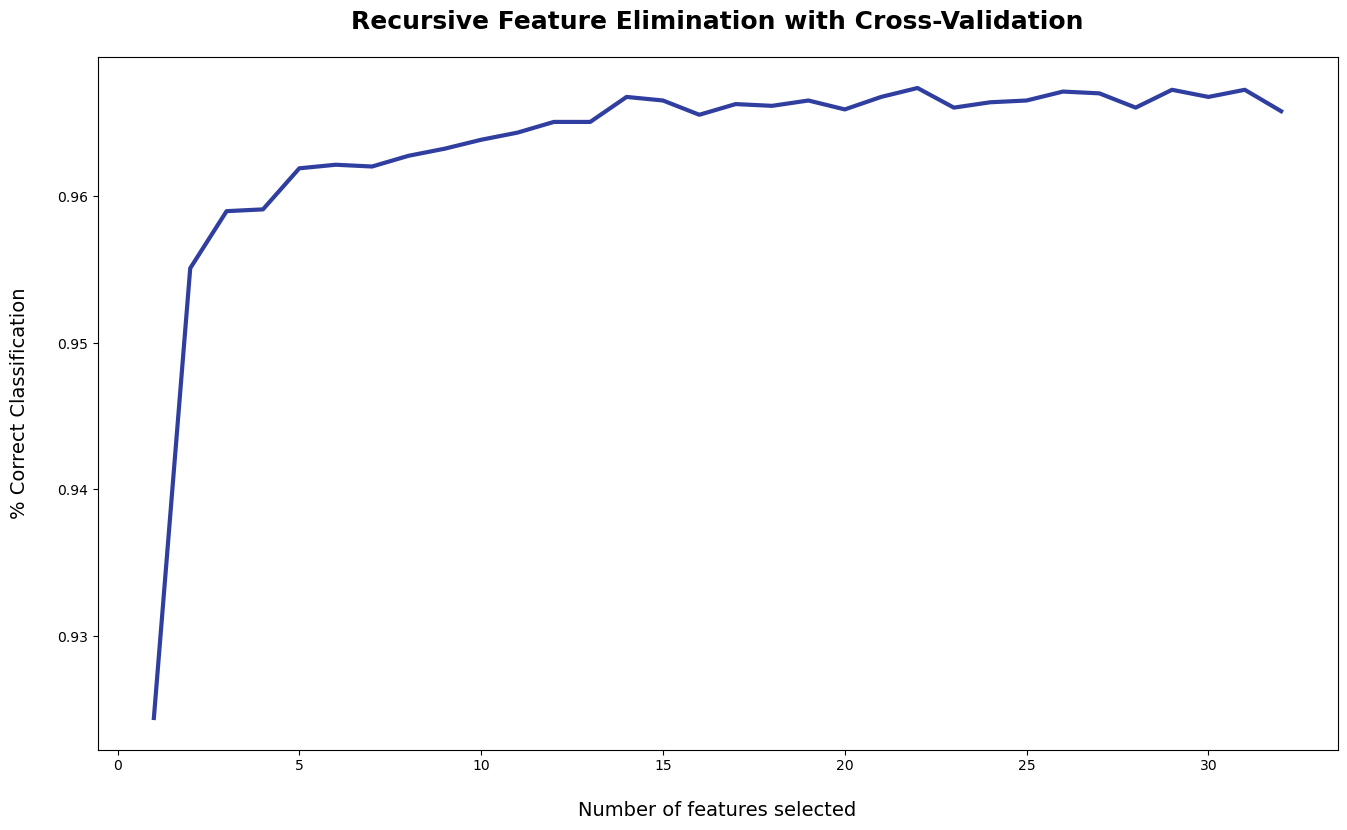

In [43]:
# Set figure size
plt.figure(figsize=(16, 9))

# Plot line chart
plt.plot(range(1, len(results_randomforest['mean_test_score']) + 1), results_randomforest['mean_test_score'], 
         color='#303F9F', linewidth=3)

# Graph Formatting
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20) # Setting plot title
plt.xlabel('Number of features selected', fontsize=14, labelpad=20) #  Setting label of x-axis
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20) # Setting label of y-axis
plt.savefig('./files/images/feature_selection/rfecv.png', dpi=300, bbox_inches='tight', facecolor='w') # Save figure
plt.show() # Display plot

The model is suggesting to keep **22 features**, as it is the set of features with the highest accuracy.

In [44]:
# Extract selected features as model inputs
X_train_selected = X_train_aftervif[rfecv_selected_features]
X_test_selected = X_test[rfecv_selected_features]

# Print dataframe
X_train_selected

current_ratio  times_interest_earned  ebitda_to_assets  price_to_sales  \
3378       -0.015610              -0.024599          0.206434       -0.036023   
8160       -0.015610              -0.024594         -0.059674       -0.083117   
8506       -0.015610              -0.024365         -0.137976       -0.033012   
185        -0.015607              -0.024982         -0.226126        0.010467   
6307       -0.015604              -0.021897          0.290436        0.274978   
...              ...                    ...               ...             ...   
4859       -0.015610              -0.024339          0.290126       -0.090613   
3264       -0.015608              -0.024540          0.020985       -0.065870   
9845       -0.015607              -0.024808          0.415715       -0.091563   
10799      -0.015605              -0.019891          0.459816       -0.066938   
2732       -0.015603               0.051959          0.374789       -0.030759   

       debt_to_ebitda  sales_to_account_receivables  industry_energy  \
3378        -0.009878                     -0.062182                0   
8160        -0.009198                     -0.060105                0   
8506        -0.008254                     -0.066927                0   
185          0.006935                     -0.031460                0   
6307        -0.011220                     -0.062968                0   
...               ...                           ...              ...   
4859        -0.010789                     -0.060956                0   
3264        -0.008238                     -0.058287                0   
9845        -0.011040                     -0.045605                0   
10799       -0.011278                     -0.066690                0   
2732        -0.011553                     -0.037791                0   

       debt_to_asset  accounts_payable_to_sales  cash_flow_to_sales  ...  \
3378        0.006586                  -0.003685            0.036661  ...   
8160       -0.009819                  -0.031642            0.017333  ...   
8506       -0.013695                   0.122723            0.028366  ...   
185        -0.005720                  -0.090162            0.000985  ...   
6307       -0.023517                  -0.061137            0.060541  ...   
...              ...                        ...                 ...  ...   
4859       -0.011530                   0.078851            0.037305  ...   
3264        0.013589                  -0.004404            0.045153  ...   
9845       -0.015004                  -0.040697            0.029462  ...   
10799      -0.022492                  -0.077722            0.054495  ...   
2732       -0.032681                  -0.073605            0.063605  ...   

       ebitda_to_interest_expense  price_to_earnings  \
3378                    -0.051053           0.205850   
8160                    -0.050764           0.073268   
8506                    -0.051040          -0.079931   
185                     -0.051758           0.447449   
6307                    -0.046954           0.034149   
...                           ...                ...   
4859                    -0.050492          -0.119109   
3264                    -0.051304          -0.057349   
9845                    -0.049354           0.073967   
10799                   -0.044727          -0.121168   
2732                     0.069147          -0.100329   

       working_capital_over_total_assets  return_on_assets  asset_turnover  \
3378                           -0.039914          0.106429        0.139395   
8160                           -0.025637          0.050724       -0.006804   
8506                           -0.035290          0.137167       -0.946155   
185                            -0.024018         -0.108812       -1.032946   
6307                            0.040971          0.499537       -0.574002   
...                                  ...               ...             ...   
4859                           -0.054

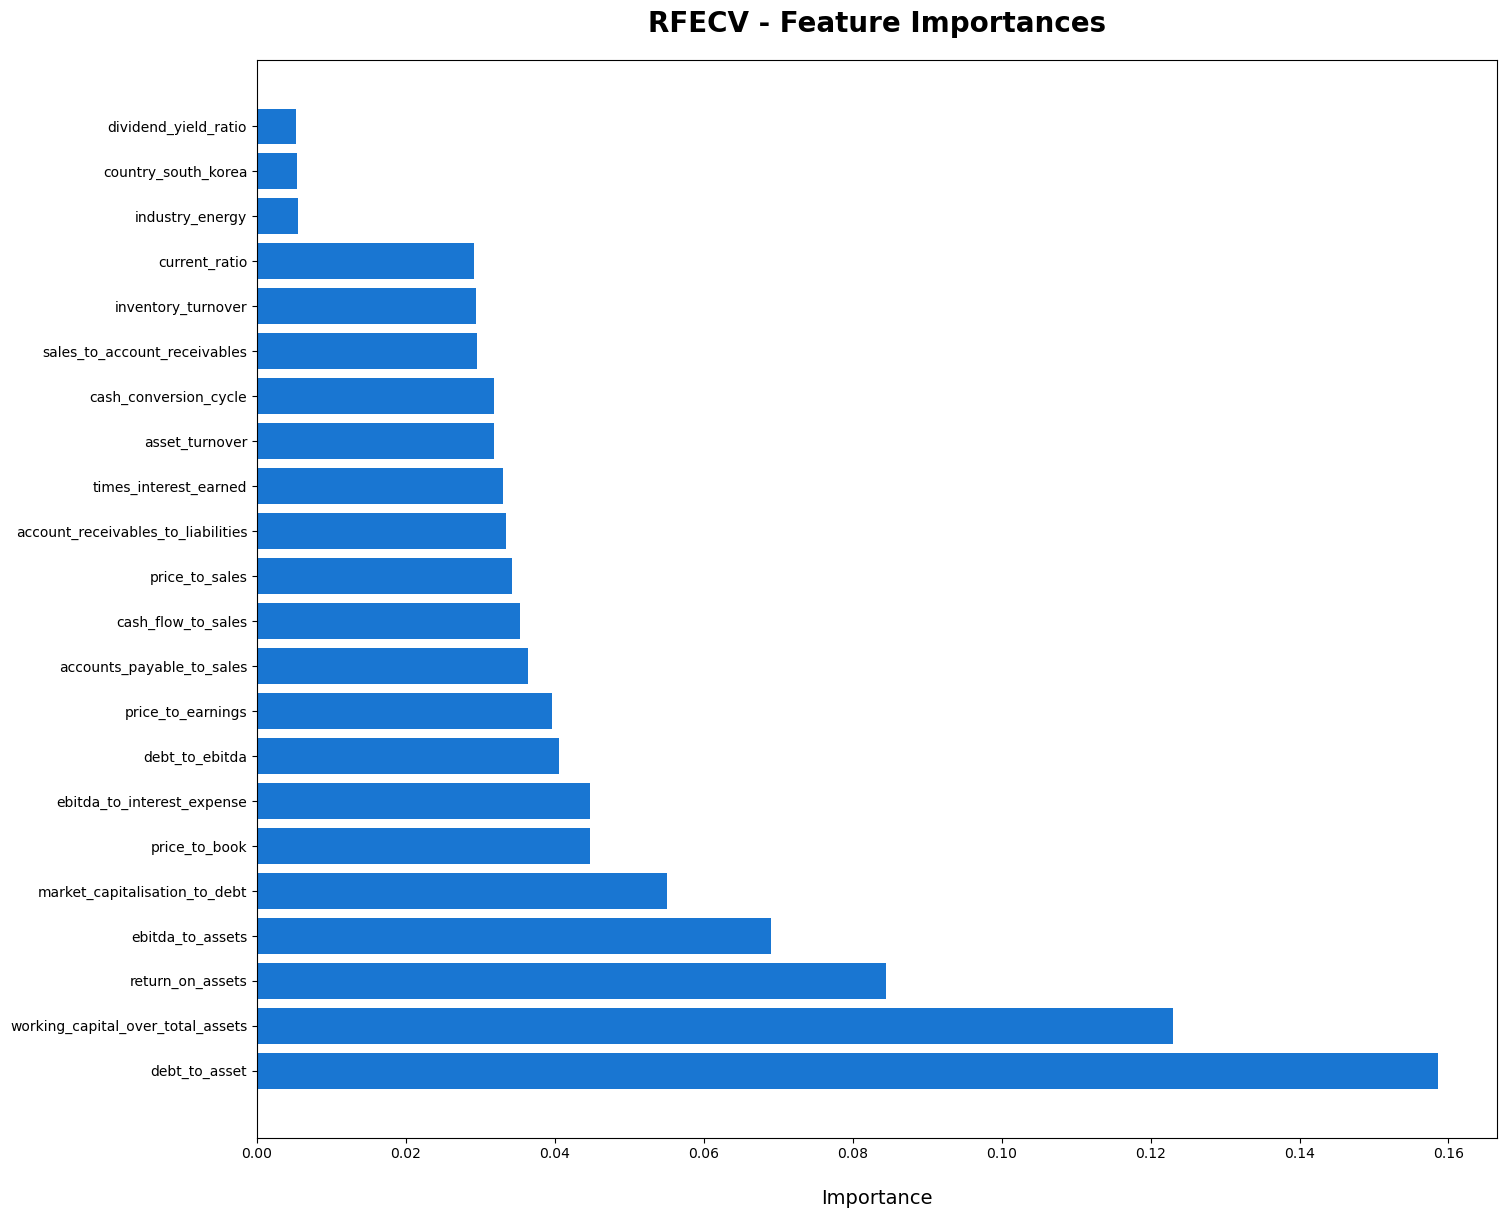

In [45]:
# Create Feature Importance Plot

# Create a dataframe and assign predictor names and its feature importance as columns
featureimportance = pd.DataFrame()
featureimportance['Features'] = X_train_selected.columns
featureimportance['Importance'] = featureimportance_randomforest

# Sort DataFrame by importance in descending order
featureimportance = featureimportance.sort_values(by='Importance', ascending=False)

# Set figure size
plt.figure(figsize=(16, 14))

# Plot bar chart
plt.barh(y=featureimportance['Features'], width=featureimportance['Importance'], color='#1976D2')

# Graph Formatting
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20) # Setting plot title
plt.xlabel('Importance', fontsize=14, labelpad=20) # Setting label of x-axis
plt.savefig('./files/images/feature_selection/rfecv_featureimportance.png', dpi=300, bbox_inches='tight', facecolor='w') # Save figure
plt.show()

**Observation:** 
- From the feature importance plot, we can conclude that the top 3 most important feature are: **Debt-to-Asset, Working Capital over Total Assets, and Return on Assets Ratios**

## 8C) P-Value

- Features with a **p-value > 0.05 are removed** in a stepwise manner
- A **low p-value (< 0.05)** means that there is a **statistically significant relationship between the predictor variable, X, and the response variable, y.** Hence, we will retain that predictor in our model as it is likely to be a meaningful addition.

In [46]:
# Creating a list of X_train features
X_train_cols = X_train_selected.columns.values.tolist()

In [47]:
import statsmodels.api as sm

# Creating a function to get model statistics
def get_stats():
    global results # Global declaration of results variable
    
    # Setting x and y
    y = y_train
    x = X_train_selected[X_train_cols]
    
    # Adding a constant term beta_0 to the predictor variable
    x_const = sm.add_constant(x)
    
    # Building the model and fitting the data 
    results = sm.Logit(y, x_const).fit(method = 'bfgs', maxiter=250)
    
    # Printing the summary table 
    print("-----non-distress: 0; distress: 1-----")
    print(results.summary())

get_stats()

         Current function value: 0.132740
         Iterations: 250
         Function evaluations: 282
         Gradient evaluations: 282
-----non-distress: 0; distress: 1-----
                           Logit Regression Results                           
Dep. Variable:               distress   No. Observations:                 8215
Model:                          Logit   Df Residuals:                     8192
Method:                           MLE   Df Model:                           22
Date:                Sun, 06 Nov 2022   Pseudo R-squ.:                  0.4262
Time:                        23:48:42   Log-Likelihood:                -1090.5
converged:                      False   LL-Null:                       -1900.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                         coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

C:\Users\Clair\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [48]:
# Saving logistic regression results as image file
plt.rc('figure', figsize=(12, 6))
plt.text(0.01, 0.05, str(results.summary()), {'fontsize': 10}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.savefig('./files/images/feature_selection/fs_logreg_start.png', bbox_inches='tight', dpi=300)
plt.close()

In [49]:
# Dropping insignificant variables (p-value > 0.05) in a stepwise manner
X_train_cols.remove('current_ratio')

get_stats()

         Current function value: 0.132717
         Iterations: 250
         Function evaluations: 284
         Gradient evaluations: 284
-----non-distress: 0; distress: 1-----
                           Logit Regression Results                           
Dep. Variable:               distress   No. Observations:                 8215
Model:                          Logit   Df Residuals:                     8193
Method:                           MLE   Df Model:                           21
Date:                Sun, 06 Nov 2022   Pseudo R-squ.:                  0.4263
Time:                        23:48:44   Log-Likelihood:                -1090.3
converged:                      False   LL-Null:                       -1900.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                         coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

C:\Users\Clair\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [50]:
X_train_cols.remove('price_to_book')

get_stats()

         Current function value: 0.132656
         Iterations: 250
         Function evaluations: 281
         Gradient evaluations: 281
-----non-distress: 0; distress: 1-----
                           Logit Regression Results                           
Dep. Variable:               distress   No. Observations:                 8215
Model:                          Logit   Df Residuals:                     8194
Method:                           MLE   Df Model:                           20
Date:                Sun, 06 Nov 2022   Pseudo R-squ.:                  0.4266
Time:                        23:48:45   Log-Likelihood:                -1089.8
converged:                      False   LL-Null:                       -1900.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                         coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

C:\Users\Clair\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\Clair\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Clair\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


In [51]:
X_train_cols.remove('ebitda_to_interest_expense')

get_stats()

Optimization terminated successfully.
         Current function value: 0.132576
         Iterations: 239
         Function evaluations: 253
         Gradient evaluations: 253
-----non-distress: 0; distress: 1-----
                           Logit Regression Results                           
Dep. Variable:               distress   No. Observations:                 8215
Model:                          Logit   Df Residuals:                     8195
Method:                           MLE   Df Model:                           19
Date:                Sun, 06 Nov 2022   Pseudo R-squ.:                  0.4269
Time:                        23:48:45   Log-Likelihood:                -1089.1
converged:                       True   LL-Null:                       -1900.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                         coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------

C:\Users\Clair\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


In [52]:
X_train_cols.remove('times_interest_earned')

get_stats()

Optimization terminated successfully.
         Current function value: 0.132577
         Iterations: 228
         Function evaluations: 266
         Gradient evaluations: 266
-----non-distress: 0; distress: 1-----
                           Logit Regression Results                           
Dep. Variable:               distress   No. Observations:                 8215
Model:                          Logit   Df Residuals:                     8196
Method:                           MLE   Df Model:                           18
Date:                Sun, 06 Nov 2022   Pseudo R-squ.:                  0.4269
Time:                        23:48:46   Log-Likelihood:                -1089.1
converged:                       True   LL-Null:                       -1900.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                         coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------

C:\Users\Clair\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


In [53]:
X_train_cols.remove('price_to_earnings')

get_stats()

Optimization terminated successfully.
         Current function value: 0.132580
         Iterations: 218
         Function evaluations: 236
         Gradient evaluations: 236
-----non-distress: 0; distress: 1-----
                           Logit Regression Results                           
Dep. Variable:               distress   No. Observations:                 8215
Model:                          Logit   Df Residuals:                     8197
Method:                           MLE   Df Model:                           17
Date:                Sun, 06 Nov 2022   Pseudo R-squ.:                  0.4269
Time:                        23:48:46   Log-Likelihood:                -1089.1
converged:                       True   LL-Null:                       -1900.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                         coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------

C:\Users\Clair\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


In [54]:
X_train_cols.remove('accounts_payable_to_sales')

get_stats()

Optimization terminated successfully.
         Current function value: 0.132593
         Iterations: 223
         Function evaluations: 253
         Gradient evaluations: 253
-----non-distress: 0; distress: 1-----
                           Logit Regression Results                           
Dep. Variable:               distress   No. Observations:                 8215
Model:                          Logit   Df Residuals:                     8198
Method:                           MLE   Df Model:                           16
Date:                Sun, 06 Nov 2022   Pseudo R-squ.:                  0.4268
Time:                        23:48:47   Log-Likelihood:                -1089.2
converged:                       True   LL-Null:                       -1900.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                         coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------

C:\Users\Clair\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


In [55]:
X_train_cols.remove('market_capitalisation_to_debt')

get_stats()

Optimization terminated successfully.
         Current function value: 0.132600
         Iterations: 192
         Function evaluations: 211
         Gradient evaluations: 211
-----non-distress: 0; distress: 1-----
                           Logit Regression Results                           
Dep. Variable:               distress   No. Observations:                 8215
Model:                          Logit   Df Residuals:                     8199
Method:                           MLE   Df Model:                           15
Date:                Sun, 06 Nov 2022   Pseudo R-squ.:                  0.4268
Time:                        23:48:47   Log-Likelihood:                -1089.3
converged:                       True   LL-Null:                       -1900.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                         coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------

C:\Users\Clair\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


In [56]:
X_train_cols.remove('price_to_sales')

get_stats()

Optimization terminated successfully.
         Current function value: 0.132630
         Iterations: 179
         Function evaluations: 193
         Gradient evaluations: 193
-----non-distress: 0; distress: 1-----
                           Logit Regression Results                           
Dep. Variable:               distress   No. Observations:                 8215
Model:                          Logit   Df Residuals:                     8200
Method:                           MLE   Df Model:                           14
Date:                Sun, 06 Nov 2022   Pseudo R-squ.:                  0.4267
Time:                        23:48:47   Log-Likelihood:                -1089.6
converged:                       True   LL-Null:                       -1900.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                         coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------

C:\Users\Clair\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


In [57]:
X_train_cols.remove('debt_to_ebitda')

get_stats()

Optimization terminated successfully.
         Current function value: 0.132719
         Iterations: 164
         Function evaluations: 169
         Gradient evaluations: 169
-----non-distress: 0; distress: 1-----
                           Logit Regression Results                           
Dep. Variable:               distress   No. Observations:                 8215
Model:                          Logit   Df Residuals:                     8201
Method:                           MLE   Df Model:                           13
Date:                Sun, 06 Nov 2022   Pseudo R-squ.:                  0.4263
Time:                        23:48:48   Log-Likelihood:                -1090.3
converged:                       True   LL-Null:                       -1900.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                         coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------

C:\Users\Clair\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


In [58]:
X_train_cols.remove('account_receivables_to_liabilities')

get_stats()

Optimization terminated successfully.
         Current function value: 0.132825
         Iterations: 150
         Function evaluations: 154
         Gradient evaluations: 154
-----non-distress: 0; distress: 1-----
                           Logit Regression Results                           
Dep. Variable:               distress   No. Observations:                 8215
Model:                          Logit   Df Residuals:                     8202
Method:                           MLE   Df Model:                           12
Date:                Sun, 06 Nov 2022   Pseudo R-squ.:                  0.4258
Time:                        23:48:48   Log-Likelihood:                -1091.2
converged:                       True   LL-Null:                       -1900.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------

C:\Users\Clair\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


In [59]:
X_train_cols.remove('sales_to_account_receivables')

get_stats()

Optimization terminated successfully.
         Current function value: 0.133329
         Iterations: 140
         Function evaluations: 143
         Gradient evaluations: 143
-----non-distress: 0; distress: 1-----
                           Logit Regression Results                           
Dep. Variable:               distress   No. Observations:                 8215
Model:                          Logit   Df Residuals:                     8203
Method:                           MLE   Df Model:                           11
Date:                Sun, 06 Nov 2022   Pseudo R-squ.:                  0.4236
Time:                        23:48:48   Log-Likelihood:                -1095.3
converged:                       True   LL-Null:                       -1900.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------

C:\Users\Clair\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


In [60]:
# Dropping features with abnormal coefficients
X_train_cols.remove('asset_turnover')
X_train_cols.remove('cash_conversion_cycle')

get_stats()

Optimization terminated successfully.
         Current function value: 0.135139
         Iterations: 127
         Function evaluations: 129
         Gradient evaluations: 129
-----non-distress: 0; distress: 1-----
                           Logit Regression Results                           
Dep. Variable:               distress   No. Observations:                 8215
Model:                          Logit   Df Residuals:                     8205
Method:                           MLE   Df Model:                            9
Date:                Sun, 06 Nov 2022   Pseudo R-squ.:                  0.4158
Time:                        23:48:48   Log-Likelihood:                -1110.2
converged:                       True   LL-Null:                       -1900.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------

C:\Users\Clair\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


In [61]:
# Adding back features just dropped
X_train_cols.append('sales_to_account_receivables')

get_stats()

Optimization terminated successfully.
         Current function value: 0.134645
         Iterations: 136
         Function evaluations: 138
         Gradient evaluations: 138
-----non-distress: 0; distress: 1-----
                           Logit Regression Results                           
Dep. Variable:               distress   No. Observations:                 8215
Model:                          Logit   Df Residuals:                     8204
Method:                           MLE   Df Model:                           10
Date:                Sun, 06 Nov 2022   Pseudo R-squ.:                  0.4180
Time:                        23:48:49   Log-Likelihood:                -1106.1
converged:                       True   LL-Null:                       -1900.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------

C:\Users\Clair\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


In [62]:
# Dropping insignificant features (p-value > 0.05)
X_train_cols.remove('cash_flow_to_sales')

get_stats()

Optimization terminated successfully.
         Current function value: 0.135016
         Iterations: 128
         Function evaluations: 137
         Gradient evaluations: 137
-----non-distress: 0; distress: 1-----
                           Logit Regression Results                           
Dep. Variable:               distress   No. Observations:                 8215
Model:                          Logit   Df Residuals:                     8205
Method:                           MLE   Df Model:                            9
Date:                Sun, 06 Nov 2022   Pseudo R-squ.:                  0.4164
Time:                        23:48:49   Log-Likelihood:                -1109.2
converged:                       True   LL-Null:                       -1900.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------

C:\Users\Clair\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


In [63]:
# Since the previously added feature ('sales_to_account_receivables') has a p-value > 0.05, it is therefore dropped again
X_train_cols.remove('sales_to_account_receivables')

get_stats()
# All features are now significant (p-value < 0.05)

Optimization terminated successfully.
         Current function value: 0.135497
         Iterations: 111
         Function evaluations: 112
         Gradient evaluations: 112
-----non-distress: 0; distress: 1-----
                           Logit Regression Results                           
Dep. Variable:               distress   No. Observations:                 8215
Model:                          Logit   Df Residuals:                     8206
Method:                           MLE   Df Model:                            8
Date:                Sun, 06 Nov 2022   Pseudo R-squ.:                  0.4143
Time:                        23:48:49   Log-Likelihood:                -1113.1
converged:                       True   LL-Null:                       -1900.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------

C:\Users\Clair\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


In [64]:
# Saving logistic regression results as image file
plt.rc('figure', figsize=(12, 6))

# get_stats()
plt.text(0.01, 0.05, str(results.summary()), {'fontsize': 10}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.savefig('./files/images/feature_selection/fs_logreg_end.png', bbox_inches='tight', dpi=300)
plt.close()

In [65]:
# 14 features dropped
print('Number of features at the start:', X_train_selected.shape[1])
print('Number of features after p-value elimination:', len(X_train_cols))
print('')
print('Final features used as model inputs:', X_train_cols)

Number of features at the start: 22
Number of features after p-value elimination: 8

Final features used as model inputs: ['ebitda_to_assets', 'industry_energy', 'debt_to_asset', 'inventory_turnover', 'working_capital_over_total_assets', 'return_on_assets', 'dividend_yield_ratio', 'country_south_korea']


In [66]:
# Check sliced dataframe with final features
# Train the model with these 8 features
X_train_selected[X_train_cols]

ebitda_to_assets  industry_energy  debt_to_asset  inventory_turnover  \
3378           0.206434                0       0.006586           -0.042100   
8160          -0.059674                0      -0.009819           -0.042032   
8506          -0.137976                0      -0.013695           -0.042132   
185           -0.226126                0      -0.005720           -0.019408   
6307           0.290436                0      -0.023517           -0.041988   
...                 ...              ...            ...                 ...   
4859           0.290126                0      -0.011530           -0.041976   
3264           0.020985                0       0.013589           -0.042348   
9845           0.415715                0      -0.015004           -0.042262   
10799          0.459816                0      -0.022492           -0.042019   
2732           0.374789                0      -0.032681           -0.014921   

       working_capital_over_total_assets  return_on_assets  \
3378                           -0.039914          0.106429   
8160                           -0.025637          0.050724   
8506                           -0.035290          0.137167   
185                            -0.024018         -0.108812   
6307                            0.040971          0.499537   
...                                  ...               ...   
4859                           -0.054820          0.150620   
3264                           -0.000342          0.020204   
9845                            0.048541          0.039138   
10799                           0.065980          0.668854   
2732                            0.072308          0.451691   

       dividend_yield_ratio  country_south_korea  
3378              -0.317478                    1  
8160               0.022734                    1  
8506              -0.139682                    0  
185               -0.317478                    1  
6307              -0.252585                    0  
...                     ...                  ...  
4859              -0.317478                    0  
3264              -0.317478                    1  
9845              -0.317478                    0  
10799              1.876842                    0  
2732               0.191405                    1  

[8215 rows x 8 columns]

In [67]:
import dataframe_image as dfi
dfi.export(X_train_selected[X_train_cols], './files/images/tables/final_inputs.png', max_rows=10, max_cols=8)

<h3> Checking Coerrelation Coefficient </h3>

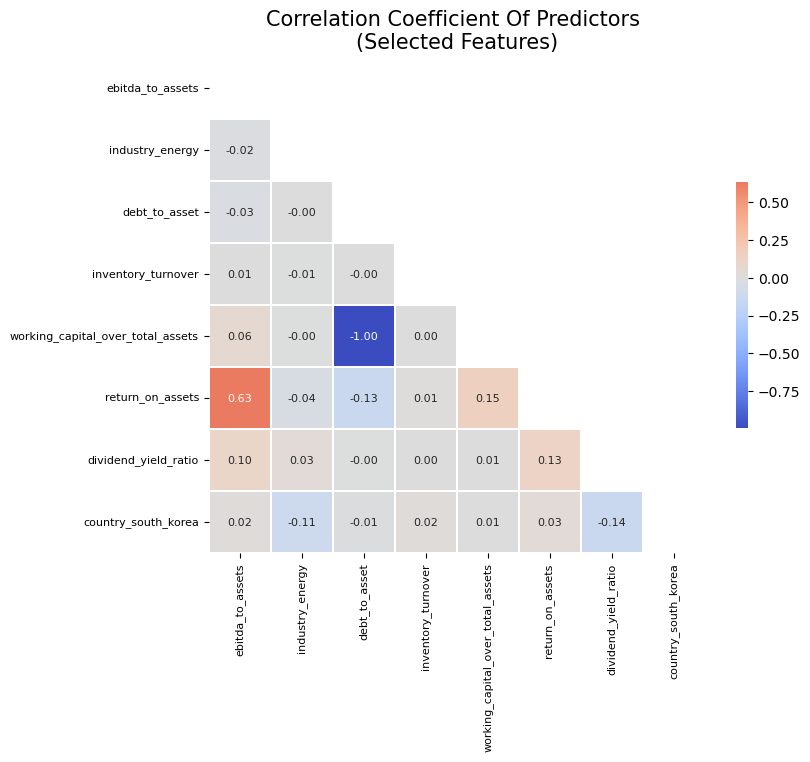

In [68]:
# Create collinearity matrix after feature selection

# Set figure size
plt.figure(figsize=(8,8))

# Compute correlation coefficient values for each pair of features
correlation_matrix = X_train_selected[X_train_cols].corr(method='pearson')

# Generate a mask to only show the bottom triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Generate heatmap
g = sns.heatmap(correlation_matrix, center=0, cmap="coolwarm", square=True, linewidth=0.3, cbar_kws={"shrink": 0.4}, 
            annot=True, mask=mask, fmt='.2f', annot_kws={"fontsize": 8})

g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 8) # Set x-axis font size
g.set_yticklabels(g.get_xmajorticklabels(), fontsize = 8) # Set y-axis font size

plt.title('Correlation Coefficient Of Predictors \n(Selected Features)', fontsize = 15)
plt.savefig('./files/images/correlationplots/pvalue_correlationplot.png', dpi=300, bbox_inches='tight', facecolor='w') # Save figure
plt.show()

**Observations:**
- **Low pairwise correlation** among the 8 features selected

<h3> Redefine X_train, y_train, X_test, y_test </h3>

In [69]:
X_train_fs = X_train_selected[X_train_cols]
y_train_fs = y_train

X_test_fs = X_test_selected[X_train_cols]
y_test_fs = y_test

<br>

# Step 9: Dealing with Imbalanced Dataset - SMOTE

- Synthetic Minority Oversampling Technique (SMOTE) is employed to handle imbalanced dataset

In [70]:
# pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [71]:
# Build logistic regression model without handling imbalanced class distribution

# Make an instance of the model, with specified parameters
logreg = LogisticRegression(penalty='none', solver='lbfgs', random_state=0)

# Fit the model with train set
logreg.fit(X_train_fs, y_train_fs.values.ravel())

# Use built model to make predictions on test set
predictions = logreg.predict(X_test_fs)

# Print classification report - With default threshold (0.5)
print(classification_report(y_test_fs, predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3328
           1       0.71      0.39      0.50       193

    accuracy                           0.96      3521
   macro avg       0.84      0.69      0.74      3521
weighted avg       0.95      0.96      0.95      3521



**Observations:**
- Poor recall rate (0.39) for minority class ('1')
- Hence, model is more biased to majority class

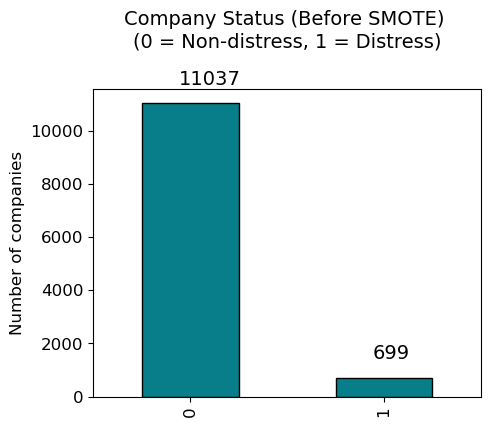

In [72]:
# Bar Chart before SMOTE
ax = df_inputs_encode['distress'].value_counts().plot(kind='bar', figsize=(5, 4), fontsize=12, color='#087E8B', edgecolor='k')
for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 700, str(round(i.get_height(), 2)), fontsize=14)

ax.set_title('Company Status (Before SMOTE) \n(0 = Non-distress, 1 = Distress)', size=14, pad=30)
ax.set_ylabel('Number of companies', fontsize=12)
plt.savefig('./files/images/smote/smote_before.png', dpi=300, bbox_inches='tight', facecolor='w') # Save figure

In [73]:
# Distress percentage = Number of companies classified as distress/Total records
# 5.96% of companies are classified as distress before SMOTE
print('Percentage of companies classified as distress (before SMOTE):', (df_inputs_encode['distress'].value_counts()[1]/
                                                          len(df_inputs_encode)*100).round(2).astype(str) + '%')

Percentage of companies classified as distress (before SMOTE): 5.96%


In [74]:
print('Before OverSampling, the shape of X_train: {}'.format(X_train_fs.shape))
print('Before OverSampling, the shape of y_train: {} \n'.format(y_train_fs.shape))

print("Before OverSampling, counts of label '1' (distress): {}".format((y_train_fs['distress'] == 1).sum()))
print("Before OverSampling, counts of label '0' (non distress): {} \n".format((y_train_fs['distress'] == 0).sum()))

# Set ratio = 0.30 for SMOTE
smote = SMOTE(sampling_strategy = 0.30, random_state = 0)
X_train_sm, y_train_sm = smote.fit_resample(X_train_fs, y_train_fs)

# Retain pandas dataframe structure after SMOTE
X_train_sm = pd.DataFrame(X_train_sm, columns=X_train_fs.columns)
y_train_sm = pd.DataFrame(y_train_sm, columns=y_train_fs.columns)

print('After OverSampling, the shape of X_train: {}'.format(X_train_sm.shape))
print('After OverSampling, the shape of y_train: {} \n'.format(y_train_sm.shape))
  
print("After OverSampling, counts of label '1' (distress): {}".format((y_train_sm['distress'] == 1).sum()))
print("After OverSampling, counts of label '0' (non distress): {} \n".format((y_train_sm['distress'] == 0).sum()))

print('Balance of positive and negative classes (%):')
round(y_train_sm.value_counts(normalize=True) * 100, 2)

Before OverSampling, the shape of X_train: (8215, 8)
Before OverSampling, the shape of y_train: (8215, 1) 

Before OverSampling, counts of label '1' (distress): 506
Before OverSampling, counts of label '0' (non distress): 7709 

After OverSampling, the shape of X_train: (10021, 8)
After OverSampling, the shape of y_train: (10021, 1) 

After OverSampling, counts of label '1' (distress): 2312
After OverSampling, counts of label '0' (non distress): 7709 

Balance of positive and negative classes (%):


distress
0           76.93
1           23.07
dtype: float64

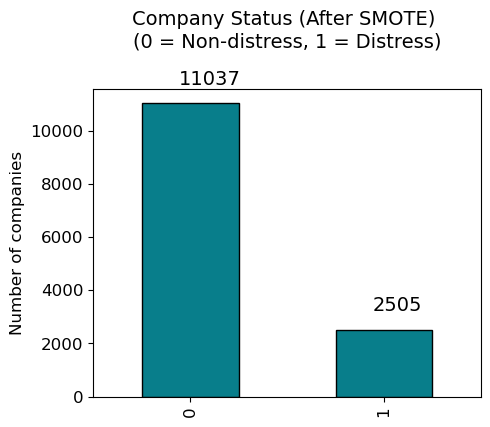

In [75]:
y_train_combined = pd.concat([y_train_sm, y_test_fs])

# Bar Chart after SMOTE
ax = y_train_combined['distress'].value_counts().plot(kind='bar', figsize=(5, 4), fontsize=12, color='#087E8B', edgecolor='k')
for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 700, str(round(i.get_height(), 2)), fontsize=14)

ax.set_title('Company Status (After SMOTE) \n(0 = Non-distress, 1 = Distress)', size=14, pad=30)
ax.set_ylabel('Number of companies', fontsize=12)
plt.savefig('./files/images/smote/smote_after.png', dpi=300, bbox_inches='tight', facecolor='w') # Save figure

In [76]:
# Distress percentage = Number of companies classified as distress/Total records
# 18.5% of companies are classified as distress after SMOTE
print('Percentage of companies classified as distress (after SMOTE):', (y_train_combined['distress'].value_counts()[1]/
                                                          len(y_train_combined)*100).round(2).astype(str) + '%')

Percentage of companies classified as distress (after SMOTE): 18.5%


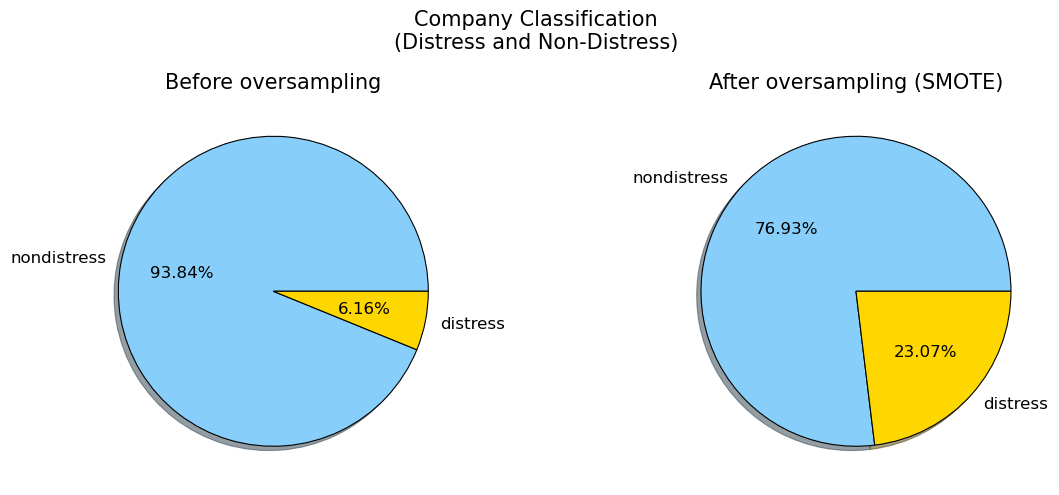

In [77]:
# Set figure size of subplots
fig, axs = plt.subplots(ncols=2, figsize=(12, 5))
fig.suptitle("Company Classification \n(Distress and Non-Distress) ", fontsize=15) # Setting subplot title

autopct = '%.2f%%'
colors = ['lightskyblue', 'gold']
labels = ['nondistress', 'distress']

# Plot pie chart (before SMOTE)
y_train_fs['distress'].value_counts().plot.pie(autopct=autopct, colors=colors, ax=axs[0], labels=labels, 
                                                     textprops={'fontsize': 12}, shadow=True, ylabel='',
                                                     wedgeprops = {"edgecolor":"k", 'linewidth' : 0.8})
axs[0].set_title("Before oversampling", size=15)

# Plot pie chart (after SMOTE)
y_train_sm['distress'].value_counts().plot.pie(autopct=autopct, colors=colors, ax=axs[1], labels=labels, 
                                                     textprops={'fontsize': 12}, shadow=True, ylabel='',
                                                     wedgeprops = {"edgecolor":"black", 'linewidth' : 0.8})
axs[1].set_title("After oversampling (SMOTE)", size=15)

# Graph formatting
fig.tight_layout()
plt.savefig('./files/images/smote/piechart_smote_train.png', dpi=300, bbox_inches='tight', facecolor='w') # Save figure
plt.show() # Display plot

- Pie chart illustrates the distribution of y_train set
- Proportion of 'distress' **increased from 6.16% to 23.07%**

In [78]:
# Build logistic regression model after handling imbalanced class distribution

# Make an instance of the model, with specified parameters
logreg = LogisticRegression(penalty='none', solver='lbfgs', random_state=0)

# Fit the model with train set
logreg.fit(X_train_sm, y_train_sm.values.ravel())

# Use built model to make predictions on test set
predictions = logreg.predict(X_test_fs)

# Print classification report - With default threshold (0.5)
print(classification_report(y_test_fs, predictions))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      3328
           1       0.42      0.62      0.50       193

    accuracy                           0.93      3521
   macro avg       0.70      0.78      0.73      3521
weighted avg       0.95      0.93      0.94      3521



**Observations:**
- Test Accuracy (Before SMOTE): 0.96
- Recall value of minority class ('1') (Before SMOTE): 0.39


- Test Accuracy (After SMOTE): 0.93
- Recall value of minority class ('1') (After SMOTE): 0.62

Although **accuracy reduced from 96% to 93%**, but **recall value of minority class has improved significantly from 39% to 62%.**

<br>



# Step 10: Modelling

<h3> Redefine X_train, y_train, X_test, y_test </h3>

In [79]:
X_train_final = X_train_sm
y_train_final = y_train_sm

X_test_final = X_test_fs
y_test_final = y_test_fs

## 1. Multiple Logistic Regression

In [80]:
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score

In [81]:
# Add a constant term beta_0 to the predictor variable
Xtrain_1 = sm.add_constant(X_train_final)

# Training the model with Logistic Regression
model = sm.Logit(y_train_final, Xtrain_1)

# Building the model and fitting the data 
log_reg = model.fit(method = 'bfgs', maxiter=500)
 
# Print summary table 
print("-----non-distress: 0; distress: 1-----")
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.283788
         Iterations: 96
         Function evaluations: 97
         Gradient evaluations: 97
-----non-distress: 0; distress: 1-----
                           Logit Regression Results                           
Dep. Variable:               distress   No. Observations:                10021
Model:                          Logit   Df Residuals:                    10012
Method:                           MLE   Df Model:                            8
Date:                Mon, 07 Nov 2022   Pseudo R-squ.:                  0.4746
Time:                        00:24:29   Log-Likelihood:                -2843.8
converged:                       True   LL-Null:                       -5412.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------

C:\Users\Clair\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\Clair\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


In [82]:
# Saving logistic regression results as image file
plt.rc('figure', figsize=(12, 6))
plt.text(0.01, 0.05, str(log_reg.summary()), {'fontsize': 10}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.savefig('./files/images/model_evaluation/logreg_results.png', bbox_inches='tight', dpi=300)
plt.close()

In [83]:
# Train accuracy
# Make an instance of the model, with specified parameters
logreg = LogisticRegression(penalty='none', solver='lbfgs', max_iter=100, random_state=0)

# Fit the model with train set
logreg_train_acc = logreg.fit(X_train_sm, y_train_sm.values.ravel())

print('Train Accuracy: {:.2f}'.format(logreg_train_acc.score(X_train_final, y_train_final)))

Train Accuracy: 0.88


In [84]:
# Performing 10-fold cross-validation to assess stability of trained model
logreg_acc = cross_val_score(LogisticRegression(penalty='none'), X_train_final, y_train_final.values.ravel(), 
                                cv=10, scoring='accuracy')

print("Mean accuracy score of {:.2f} with a standard deviation of {:.2f}".format(logreg_acc.mean(), logreg_acc.std()))
print('')
print('Accuracy scores for 10-fold cross-validation:')
print(logreg_acc)

Mean accuracy score of 0.88 with a standard deviation of 0.01

Accuracy scores for 10-fold cross-validation:
[0.86839482 0.88922156 0.88722555 0.87025948 0.87924152 0.8762475
 0.88423154 0.8752495  0.89021956 0.8762475 ]


It is observed that:
- Mean accuracy score derived from 10-fold cross-validation (0.88) is approximately the same as the training accuracy (0.88)
- Standard deviation of the 10-fold cross-validation is low (0.01)

This implies that the **Logistic Regression model produces stable results and is around 88% accurate** in distinguishing between distress and non-distress SMEs

<h3>Model Evaluation - Logistic Regression </h3>

In [85]:
# Use built model to predict the probability of 2 classes on test set
y_pred_logreg = logreg.predict_proba(X_test_final)

# Predicted probability of class 1
y_pred_logreg = y_pred_logreg[:,1]

# Set threshold value
threshold = 0.3

# Classification based on defined threshold
y_pred_logreg = [1 if prob > threshold else 0 for prob in y_pred_logreg]

In [86]:
# Print classification report
print(classification_report(y_test_final, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93      3328
           1       0.28      0.76      0.41       193

    accuracy                           0.88      3521
   macro avg       0.63      0.82      0.67      3521
weighted avg       0.95      0.88      0.91      3521



- Test accuracy: 0.88

Confusion Matrix:
[[2959  369]
 [  47  146]]


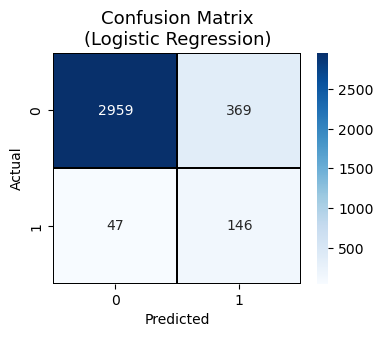

In [87]:
# Confusion Matrix
print('Confusion Matrix:')

# Compute confusion matrix
cf_matrix_logreg = confusion_matrix(y_test_final, y_pred_logreg)
print(cf_matrix_logreg)

# Visualise confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cf_matrix_logreg, annot=True, fmt='d', cmap='Blues', linewidths=0.01, linecolor='k', annot_kws={"fontsize": 10})

# Graph formatting
plt.title('Accuracy Score:{}'.format(round((accuracy_score(y_test_final, y_pred_logreg)), 3)))
plt.title('Confusion Matrix\n(Logistic Regression)', fontsize=13)
plt.ylabel('Actual', fontsize = 10)
plt.xlabel('Predicted', fontsize = 10)
plt.savefig('./files/images/model_evaluation/cf_matrix_logreg.png', bbox_inches='tight', dpi=300)
plt.show()

In [88]:
# Define True Negative, False Positive, False Negative, and True Positive
tn, fp, fn, tp = cf_matrix_logreg.ravel()

print('Performance of Logistic Regression classifier on test set:')
print('----------------------------------------------------------')

# Accuracy Score
accuracyrate_logreg = accuracy_score(y_test_final, y_pred_logreg)
print('Overall Accuracy Rate: {:.2f}%\n'.format(accuracyrate_logreg*100))

# Specificity
specificity_logreg = tn/(tn+fp)
print('Specificity: {:.2f}%'.format(specificity_logreg*100))

# Type I Error
typeierror_logreg = fp/(tn+fp)
print('Type I Error: {:.2f}%'.format(typeierror_logreg*100))

# Sensitivity
sensitivity_logreg = tp/(tp+fn)
print('Sensitivity: {:.2f}%'.format(sensitivity_logreg*100))

# Type II Error
typeiierror_logreg = fn/(tp+fn)
print('Type II Error: {:.2f}%'.format(typeiierror_logreg*100))
print('')

# Area Under Curve (AUC)
auc_logreg = roc_auc_score(y_test_final, y_pred_logreg)
print('Area Under Curve (AUC):', round(auc_logreg, 2))

Performance of Logistic Regression classifier on test set:
----------------------------------------------------------
Overall Accuracy Rate: 88.19%

Specificity: 88.91%
Type I Error: 11.09%
Sensitivity: 75.65%
Type II Error: 24.35%

Area Under Curve (AUC): 0.82


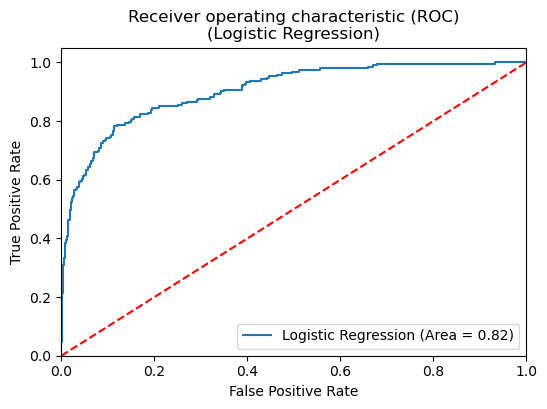

In [89]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_final, logreg.predict_proba(X_test_final)[:,1])
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label='Logistic Regression (Area = %0.2f)' % auc_logreg)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)\n(Logistic Regression)')
plt.legend(loc="lower right")

plt.savefig('./files/images/model_evaluation/roc_logreg.png', bbox_inches='tight', dpi=300)
plt.show()

<br>

## 2. Decision Tree

In [90]:
from sklearn.tree import DecisionTreeClassifier

In [91]:
# Building the model
dt = DecisionTreeClassifier(max_depth=3, criterion= 'gini', random_state=42)

# Fitting the model
dt.fit(X_train_final, y_train_final)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [92]:
# Train accuracy
print('Train Accuracy: {:.2f}'.format(dt.score(X_train_final, y_train_final)))

Train Accuracy: 0.88


In [93]:
# Performing 10-fold cross-validation to assess stability of trained model
dt_acc = cross_val_score(dt, X_train_final, y_train_final, cv=10, scoring='accuracy')

print("Mean accuracy score of {:.2f} with a standard deviation of {:.2f}".format(dt_acc.mean(), dt_acc.std()))
print('')
print('Accuracy scores for 10-fold cross-validation:')
print(dt_acc)

Mean accuracy score of 0.88 with a standard deviation of 0.01

Accuracy scores for 10-fold cross-validation:
[0.87437687 0.88822355 0.87924152 0.8762475  0.8752495  0.88622754
 0.8742515  0.87225549 0.86726547 0.87025948]


It is observed that:
- Mean accuracy score derived from 10-fold cross-validation (0.88) is approximately the same as the training accuracy (0.88)
- Standard deviation of the 10-fold cross-validation is low (0.01)

This implies that the **Decision Tree model produces stable results and is around 88% accurate** in distinguishing between distress and non-distress SMEs

<h3> Visualising Decision Trees </h3>

<h3> (1) Tree Diagram </h3>

In [94]:
# Get feature names
feature_names = X_train_final.columns

# Get output
labels = y_train_final['distress'].unique()
labels = labels.astype(str)

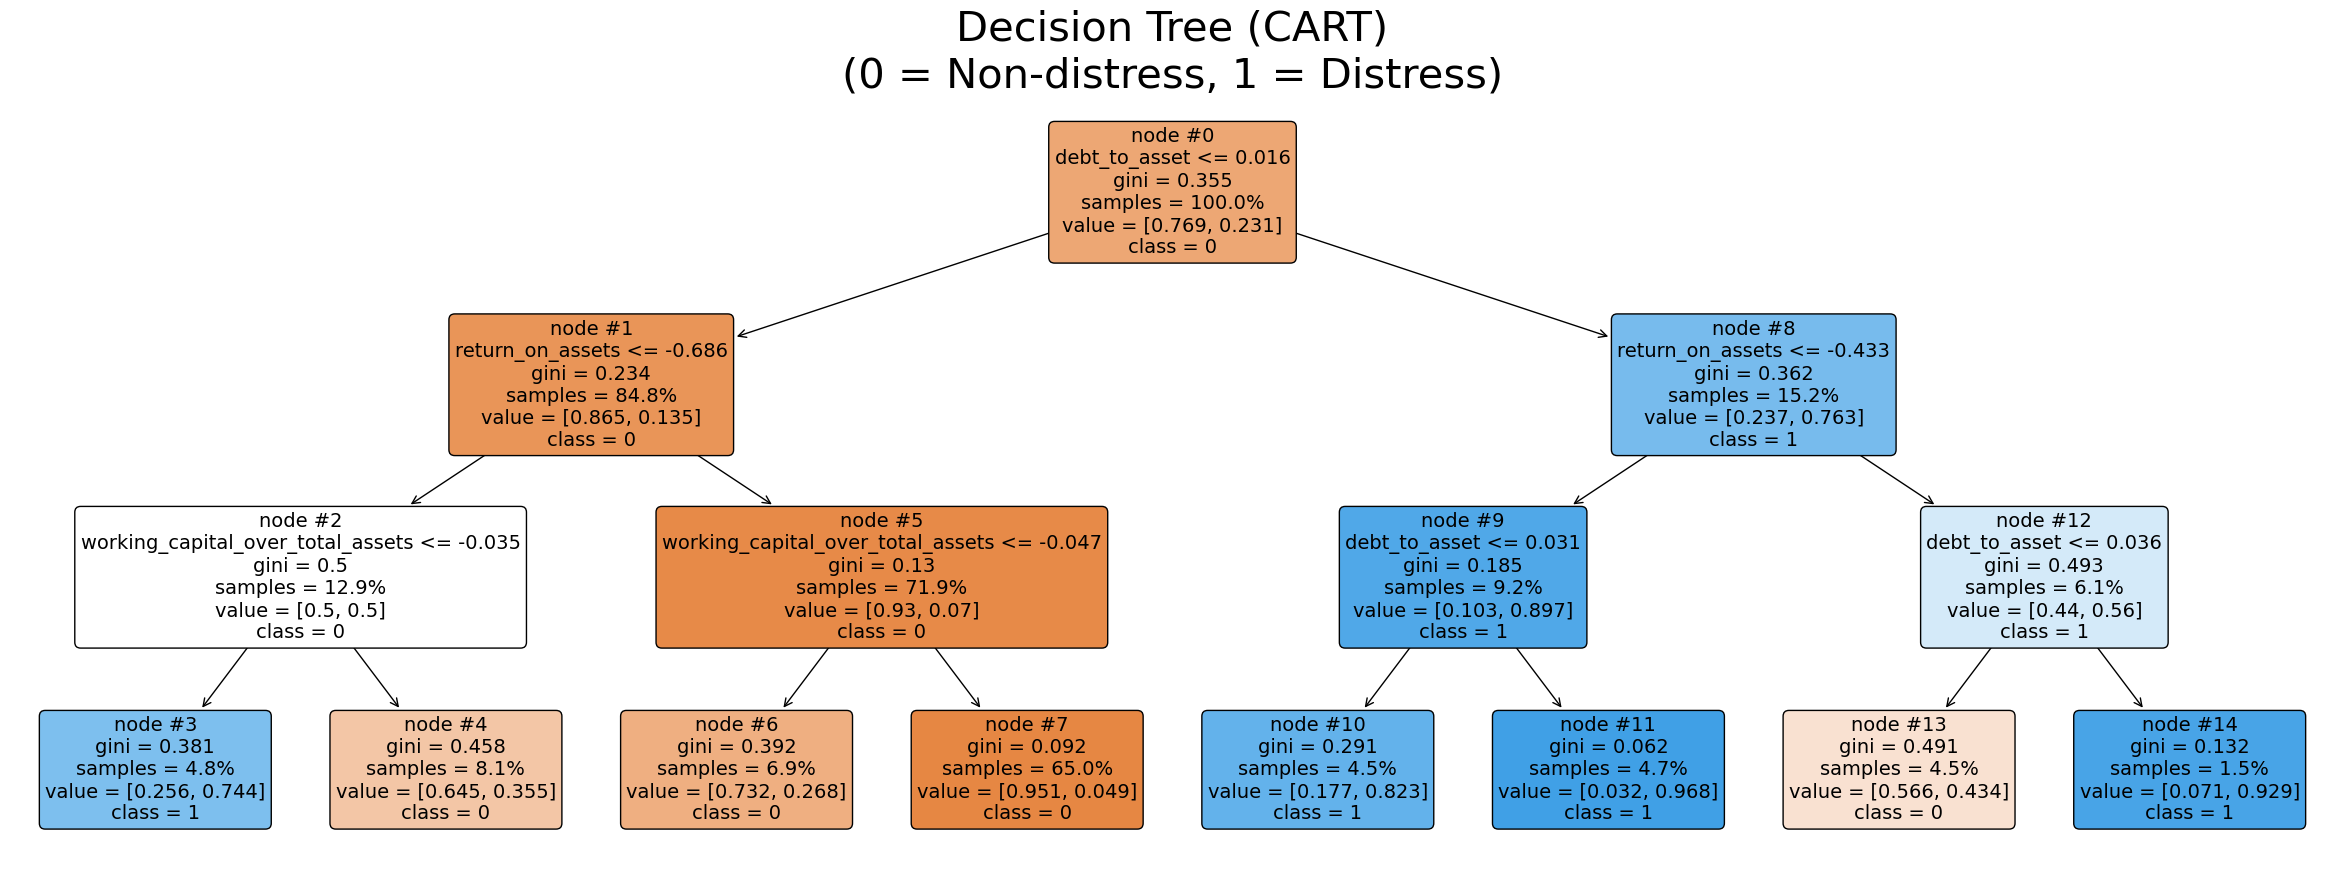

In [95]:
from sklearn import tree

# Plot the figure, Setting a white background
plt.figure(figsize=(30,10), facecolor ='white')

# Create the tree plot
a = tree.plot_tree(dt, feature_names = feature_names, class_names = labels, rounded = True, fontsize=14, filled = True,
                  node_ids=True, proportion=True)
plt.title('Decision Tree (CART)\n(0 = Non-distress, 1 = Distress)', fontsize=30)
plt.savefig('./files/images/model_evaluation/decisiontree.png', bbox_inches='tight', dpi=300)
plt.show()

<h3> (2) Text-based Diagram </h3>

In [96]:
from sklearn.tree import export_text

# Export decision rules
tree_rules = export_text(dt, feature_names = list(feature_names))

# Print result
print(tree_rules)

|--- debt_to_asset <= 0.02
|   |--- return_on_assets <= -0.69
|   |   |--- working_capital_over_total_assets <= -0.04
|   |   |   |--- class: 1
|   |   |--- working_capital_over_total_assets >  -0.04
|   |   |   |--- class: 0
|   |--- return_on_assets >  -0.69
|   |   |--- working_capital_over_total_assets <= -0.05
|   |   |   |--- class: 0
|   |   |--- working_capital_over_total_assets >  -0.05
|   |   |   |--- class: 0
|--- debt_to_asset >  0.02
|   |--- return_on_assets <= -0.43
|   |   |--- debt_to_asset <= 0.03
|   |   |   |--- class: 1
|   |   |--- debt_to_asset >  0.03
|   |   |   |--- class: 1
|   |--- return_on_assets >  -0.43
|   |   |--- debt_to_asset <= 0.04
|   |   |   |--- class: 0
|   |   |--- debt_to_asset >  0.04
|   |   |   |--- class: 1



<h3> Model Evaluation - Decision Tree </h3>

In [97]:
# Use built model to predict the probability of 2 classes on test set
y_pred_dt = dt.predict_proba(X_test_final)

# Predicted probability of class 1
y_pred_dt = y_pred_dt[:,1]

# Set threshold value
threshold = 0.3

# Classification based on defined threshold
y_pred_dt = [1 if prob > threshold else 0 for prob in y_pred_dt]

In [98]:
# Print classification report
print(classification_report(y_test_final, y_pred_dt))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92      3328
           1       0.25      0.74      0.38       193

    accuracy                           0.86      3521
   macro avg       0.62      0.81      0.65      3521
weighted avg       0.94      0.86      0.89      3521



- Test accuracy: 0.86

Confusion Matrix:
[[2902  426]
 [  50  143]]


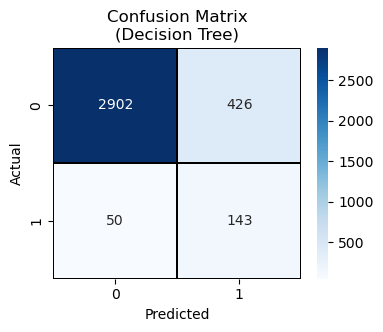

In [99]:
# Confusion Matrix
print('Confusion Matrix:')

# Compute confusion matrix
cf_matrix_dt = confusion_matrix(y_test_final, y_pred_dt)
print(cf_matrix_dt)

# Visualise confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cf_matrix_dt, annot=True, fmt='d', cmap='Blues', linewidths=0.01, linecolor='k')

# Graph Formatting
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Accuracy Score:{}'.format(round((accuracy_score(y_test_final, y_pred_dt)),3)))
plt.title('Confusion Matrix\n(Decision Tree)')
plt.savefig('./files/images/model_evaluation/cf_matrix_dt.png', bbox_inches='tight', dpi=300)
plt.show()

In [100]:
# Define True Negative, False Positive, False Negative, and True Positive
tn, fp, fn, tp = cf_matrix_dt.ravel()

print('Performance of Decision Tree Classifier on test set:')
print('----------------------------------------------------')

# Accuracy Score
accuracyrate_dt = accuracy_score(y_test_final, y_pred_dt)
print('Overall Accuracy Rate (Testing Set): {:.2f}%\n'.format(accuracyrate_dt*100))

# Specificity
specificity_dt = tn/(tn+fp)
print('Specificity: {:.2f}%'.format(specificity_dt*100))

# Type I Error
typeierror_dt = fp/(tn+fp)
print('Type I Error: {:.2f}%'.format(typeierror_dt*100))

# Sensitivity
sensitivity_dt = tp/(tp+fn)
print('Sensitivity: {:.2f}%'.format(sensitivity_dt*100))

# Type II Error
typeiierror_dt = fn/(tp+fn)
print('Type II Error: {:.2f}%'.format(typeiierror_dt*100))
print('')

# Area Under Curve (AUC)
auc_dt = roc_auc_score(y_test_final, y_pred_dt)
print('Area Under Curve (AUC):', round(auc_dt, 2))

Performance of Decision Tree Classifier on test set:
----------------------------------------------------
Overall Accuracy Rate (Testing Set): 86.48%

Specificity: 87.20%
Type I Error: 12.80%
Sensitivity: 74.09%
Type II Error: 25.91%

Area Under Curve (AUC): 0.81


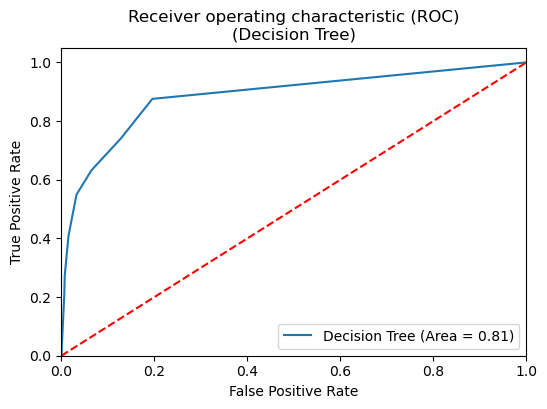

In [101]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_final, dt.predict_proba(X_test_final)[:,1])
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label='Decision Tree (Area = %0.2f)' % auc_dt)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)\n(Decision Tree)')
plt.legend(loc="lower right")

plt.savefig('./files/images/model_evaluation/roc_dt.png', bbox_inches='tight', dpi=300)
plt.show()

<br>

## 3. Artificial Neural Network

In [102]:
# !pip install tensorflow
# !pip install keras

In [103]:
import keras
from keras.layers import Dense, Activation
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.models import load_model
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold

In [104]:
# Define number of nodes in the input layer
n_features = X_train_final.shape[1]
print(n_features) # 8 features

8


In [105]:
# Create a function that returns neural network model

def build_ann():
    # Initialising ANN
    ann = Sequential()
    
    # Setting the number of nodes in hidden layer (i.e., average number of nodes in input and output layer)
    # Number of hidden neurons = (number of nodes in inputs + number of nodes in output)/2
    units = (n_features+1)/2
    units = np.ceil(units)

    # Add first layer with 8 nodes, ReLU activation function
    # 'kernel_initializer' is used to initialize the hidden Layer weights uniformly
    ann.add(Dense(name = 'h1', units = units, kernel_initializer = 'HeUniform', activation = 'relu', input_shape=(n_features,)))
    
    # Add second hidden layer with 5 nodes, ReLU activation function
    ann.add(Dense(name = 'h2', units = units, kernel_initializer = 'HeUniform', activation = 'relu'))
    
    # Add output layer with 1 node (which is target variable i.e., distress - the variable predicting), Sigmoid activation function
    # Sigmoid activation function is used because we want to predict the probability between 0 and 1 as an output
    ann.add(Dense(name = 'output', units = 1, kernel_initializer = 'HeUniform', activation = 'sigmoid'))

    # Compiling ANN
    # Optimizer is used to automatically compute the optimal weightage factor for each connector
    optimizer = keras.optimizers.Adam(lr=0.025) # Learning rate
    # Binary cross-entropy loss is used because we want to compare each of the predicted probabilities to the actual class output
    ann.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    # Early stopping callback (It stops training when there is no improvement in the validation loss for 10 consecutive epochs)  
    es = EarlyStopping(monitor = 'val_accuracy', mode = 'max', patience = 10, restore_best_weights = True)
    
    # Fitting ANN
    ann.fit(X_train_final, y_train_final, callbacks=[es], batch_size = 32, epochs = 100, validation_split = 0.1, 
            shuffle = True, verbose = 0)
    
    # Save model results
    # ann.save('./files/ann_model.h5')
    
    # load a saved keras model/Return compiled model
    ann = load_model('./files/ann_saved_models/ann_model.h5')
    
    return ann

In [106]:
# Print summary
build_ann().summary()

Model: "sequential_64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
h1 (Dense)                   (None, 5)                 45        
_________________________________________________________________
h2 (Dense)                   (None, 5)                 30        
_________________________________________________________________
output (Dense)               (None, 1)                 6         
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [107]:
# Train accuracy
ann_train_loss, ann_train_acc = build_ann().evaluate(X_train_final, y_train_final, verbose=0)
print('Train Accuracy: {:.2f}'.format(round(ann_train_acc,2)))

Train Accuracy: 0.88


In [108]:
# Performing 10-fold cross-validation to assess stability of trained model
ann_classifier = KerasClassifier(build_fn = build_ann, verbose = 0, shuffle = True) # Wrap the model

ann_acc = cross_val_score(ann_classifier, X_train_final, y_train_final,
                          cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42), scoring='accuracy')

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [109]:
print("Mean accuracy score of {:.2f} with a standard deviation of {:.2f}".format(ann_acc.mean(), ann_acc.std()))
print('')
print('Accuracy scores for 10-fold cross-validation:')
print(ann_acc)

Mean accuracy score of 0.88 with a standard deviation of 0.01

Accuracy scores for 10-fold cross-validation:
[0.889332   0.87325349 0.88722555 0.87325349 0.86626747 0.86826347
 0.88423154 0.87325349 0.9011976  0.88922156]


It is observed that:
- Mean accuracy score derived from 10-fold cross-validation (0.88) is approximately the same as the training accuracy (0.88)
- Standard deviation of the 10-fold cross-validation is low (0.01)

This implies that the **Artificial Neural Network model produces stable results and is around 88% accurate** in distinguishing between distress and non-distress SMEs

<h3> Model Evaluation - Artificial Neural Network </h3>

In [110]:
# Use built model to predict the probability of 2 classes on test set
y_pred_ann = build_ann().predict(X_test_final)

# Set threshold value
threshold = 0.3

# Classification based on defined threshold
y_pred_ann = (y_pred_ann > threshold)

In [111]:
# Print classification report
print(classification_report(y_test_final, y_pred_ann))

              precision    recall  f1-score   support

           0       0.99      0.87      0.92      3328
           1       0.27      0.82      0.40       193

    accuracy                           0.87      3521
   macro avg       0.63      0.85      0.66      3521
weighted avg       0.95      0.87      0.90      3521



- Test accuracy: 0.87

Confusion Matrix:
[[2888  440]
 [  34  159]]


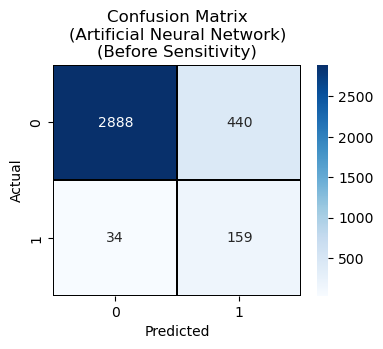

In [112]:
# Confusion Matrix
print('Confusion Matrix:')

# Compute confusion matrix
cf_matrix_ann = confusion_matrix(y_test_final, y_pred_ann)
print(cf_matrix_ann)

# Visualise confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cf_matrix_ann, annot=True, fmt='d', cmap='Blues', linewidths=0.01, linecolor='k')

# Graph formatting 
plt.title('Accuracy Score:{}'.format(round((accuracy_score(y_test_final, y_pred_ann.round())),3)))
plt.title('Confusion Matrix\n(Artificial Neural Network)\n(Before Sensitivity)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig('./files/images/model_evaluation/cf_matrix_ann.png', bbox_inches='tight', dpi=300)
plt.show()

In [113]:
# Define True Negative, False Positive, False Negative, and True Positive
tn, fp, fn, tp = cf_matrix_ann.ravel()

print('Performance of Artificial Neural Network on test set:')
print('-----------------------------------------------------')

# Accuracy Score
accuracyrate_ann_befsensitivity = accuracy_score(y_test_final, y_pred_ann)
print('Overall Accuracy Rate: {:.2f}%\n'.format(accuracyrate_ann_befsensitivity*100))

# Specificity
specificity_ann_befsensitivity = tn/(tn+fp)
print('Specificity: {:.2f}%'.format(specificity_ann_befsensitivity*100))

# Type I Error
typeierror_ann_befsensitivity = fp/(tn+fp)
print('Type I Error: {:.2f}%'.format(typeierror_ann_befsensitivity*100))

# Sensitivity
sensitivity_ann_befsensitivity = tp/(tp+fn)
print('Sensitivity: {:.2f}%'.format(sensitivity_ann_befsensitivity*100))

# Type II Error
typeiierror_ann_befsensitivity = fn/(tp+fn)
print('Type II Error: {:.2f}%'.format(typeiierror_ann_befsensitivity*100))
print('')

# Area Under Curve (AUC)
auc_ann_befsensitivity = roc_auc_score(y_test_final, y_pred_ann)
print('Area Under Curve (AUC):', round(auc_ann_befsensitivity, 2))

Performance of Artificial Neural Network on test set:
-----------------------------------------------------
Overall Accuracy Rate: 86.54%

Specificity: 86.78%
Type I Error: 13.22%
Sensitivity: 82.38%
Type II Error: 17.62%

Area Under Curve (AUC): 0.85


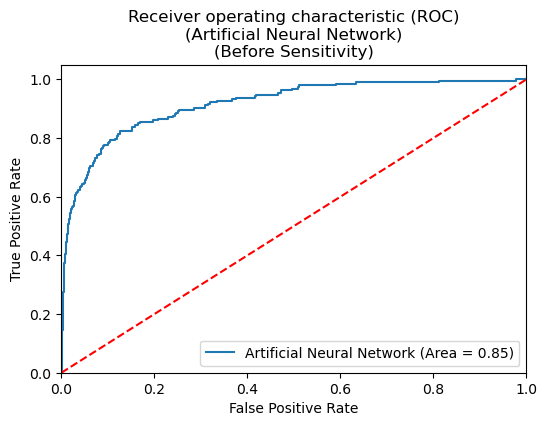

In [114]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_final, build_ann().predict(X_test_final))
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label='Artificial Neural Network (Area = %0.2f)' % auc_ann_befsensitivity)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)\n(Artificial Neural Network)\n(Before Sensitivity)')
plt.legend(loc="lower right")

plt.savefig('./files/images/model_evaluation/roc_ann.png', bbox_inches='tight', dpi=300)
plt.show()

<h3> Sensitivity Analysis </h3>

Sensitivity analysis aims to explore the impact of changes in the feature on the output in the neural network model

We change one feature while keeping the other features constant, to check the feature's impact on the model output. The values of a feature are varied based on its standard deviation away from the mean while other features are fixed at their mean.

**Note: Features are standardised with a mean of 0 and standard deviation of 1. Hence, features will be fixed at their mean of 0 while others are varied by their standard deviation with an interval of 1.*

In [115]:
# Print dataframe with 8 selected features
X_train_final

ebitda_to_assets  industry_energy  debt_to_asset  inventory_turnover  \
0              0.206434                0       0.006586           -0.042100   
1             -0.059674                0      -0.009819           -0.042032   
2             -0.137976                0      -0.013695           -0.042132   
3             -0.226126                0      -0.005720           -0.019408   
4              0.290436                0      -0.023517           -0.041988   
...                 ...              ...            ...                 ...   
10016         -0.637250                0       0.012542           -0.042022   
10017         -2.265134                0      -0.033234           -0.042304   
10018          1.186144                0       0.003597           -0.041919   
10019          0.738478                0      -0.031919           -0.042192   
10020          1.474017                0       0.079864           -0.042032   

       working_capital_over_total_assets  return_on_assets  \
0                              -0.039914          0.106429   
1                              -0.025637          0.050724   
2                              -0.035290          0.137167   
3                              -0.024018         -0.108812   
4                               0.040971          0.499537   
...                                  ...               ...   
10016                          -0.039434         -0.826198   
10017                          -0.002660         -0.926434   
10018                          -0.156594         -6.738161   
10019                          -0.047266          0.679593   
10020                          -0.186038          1.019550   

       dividend_yield_ratio  country_south_korea  
0                 -0.317478                    1  
1                  0.022734                    1  
2                 -0.139682                    0  
3                 -0.317478                    1  
4                 -0.252585                    0  
...                     ...                  ...  
10016             -0.317478                    1  
10017             -0.317478                    0  
10018             -0.317478                    0  
10019              0.595100                    0  
10020             -0.317478                    1  

[10021 rows x 8 columns]

In [116]:
# Conduct first round of sensitivity analysis on 8 selected features
# Vary one feature while keeping the other features constant

# Create a matrix with 8 numbers in each array (signify 8 features)
# Each array contains 7 zeros and 1 value that ranges from -5 to 5, where 0 represents the mean for the 7 elements and 
# -5 to 5 represents the standard deviation away from the mean

matrix = []

for index in range(0,8):

    for std in range(-5,6):
        # Create a list of 8 zeros representing the mean of each feature
        list_of_values = [0]*8
        
        # At each iteration, replace one of the zeros with (-5 to 5)
        list_of_values[index] = std
        list_of_values = np.array([list_of_values])

        matrix.append(list_of_values)

In [117]:
# Check an array in the matrix
matrix[87]

array([[0, 0, 0, 0, 0, 0, 0, 5]])

In [118]:
# Create a list to store predictions
y_predictions = []
ann_model = build_ann()

# Use built model (ANN) to predict the probability of 2 classes
for i in range(0,len(matrix)):
    y_pred = ann_model.predict(matrix[i])
    y_predictions.append(y_pred[0][0])

In [119]:
# 88 predictions in list
len(y_predictions)

88

In [120]:
# Generate a list of zscores
zscore = list(range(-5, 6))

# Create a list of X_train feature names
X_train_final_cols = X_train_final.columns.values.tolist()

# Create a dataframe containing the predictions
sensitivityanalysis = pd.DataFrame(np.array_split(y_predictions, 8), columns = zscore, index = X_train_final_cols)

# Set specific cells for binary variables as NA
sensitivityanalysis.loc['industry_energy', -5:-1] = np.nan
sensitivityanalysis.loc['industry_energy', 2:5] = np.nan
sensitivityanalysis.loc['country_south_korea', -5:-1] = np.nan
sensitivityanalysis.loc['country_south_korea', 2:5] = np.nan

# Print dataframe
sensitivityanalysis.round(4)

-5      -4      -3      -2      -1  \
ebitda_to_assets                   0.8398  0.7779  0.6989  0.5180  0.1559   
industry_energy                       NaN     NaN     NaN     NaN     NaN   
debt_to_asset                      0.0000  0.0000  0.0000  0.0000  0.0000   
inventory_turnover                 0.9910  0.9764  0.9396  0.8131  0.5012   
working_capital_over_total_assets  1.0000  1.0000  1.0000  1.0000  0.9989   
return_on_assets                   0.6454  0.6044  0.5618  0.4099  0.1199   
dividend_yield_ratio               0.9983  0.9932  0.9733  0.9005  0.5613   
country_south_korea                   NaN     NaN     NaN     NaN     NaN   

                                        0       1       2       3       4  \
ebitda_to_assets                   0.0405  0.1666  0.4294  0.5895  0.7327   
industry_energy                    0.0405  0.1246     NaN     NaN     NaN   
debt_to_asset                      0.0405  0.9998  1.0000  1.0000  1.0000   
inventory_turnover                 0.0405  0.0168  0.0075  0.0037  0.0018   
working_capital_over_total_assets  0.0405  0.0000  0.0000  0.0000  0.0000   
return_on_assets                   0.0405  0.0723  0.2386  0.3715  0.4748   
dividend_yield_ratio               0.0405  0.0127  0.0051  0.0020  0.0008   
country_south_korea                0.0405  0.0257     NaN     NaN     NaN   

                                        5  
ebitda_to_assets                   0.8405  
industry_energy                       NaN  
debt_to_asset                      1.0000  
inventory_turnover                 0.0009  
working_capital_over_total_assets  0.0000  
return_on_assets                   0.5804  
dividend_yield_ratio               0.0003  
country_south_korea                   NaN

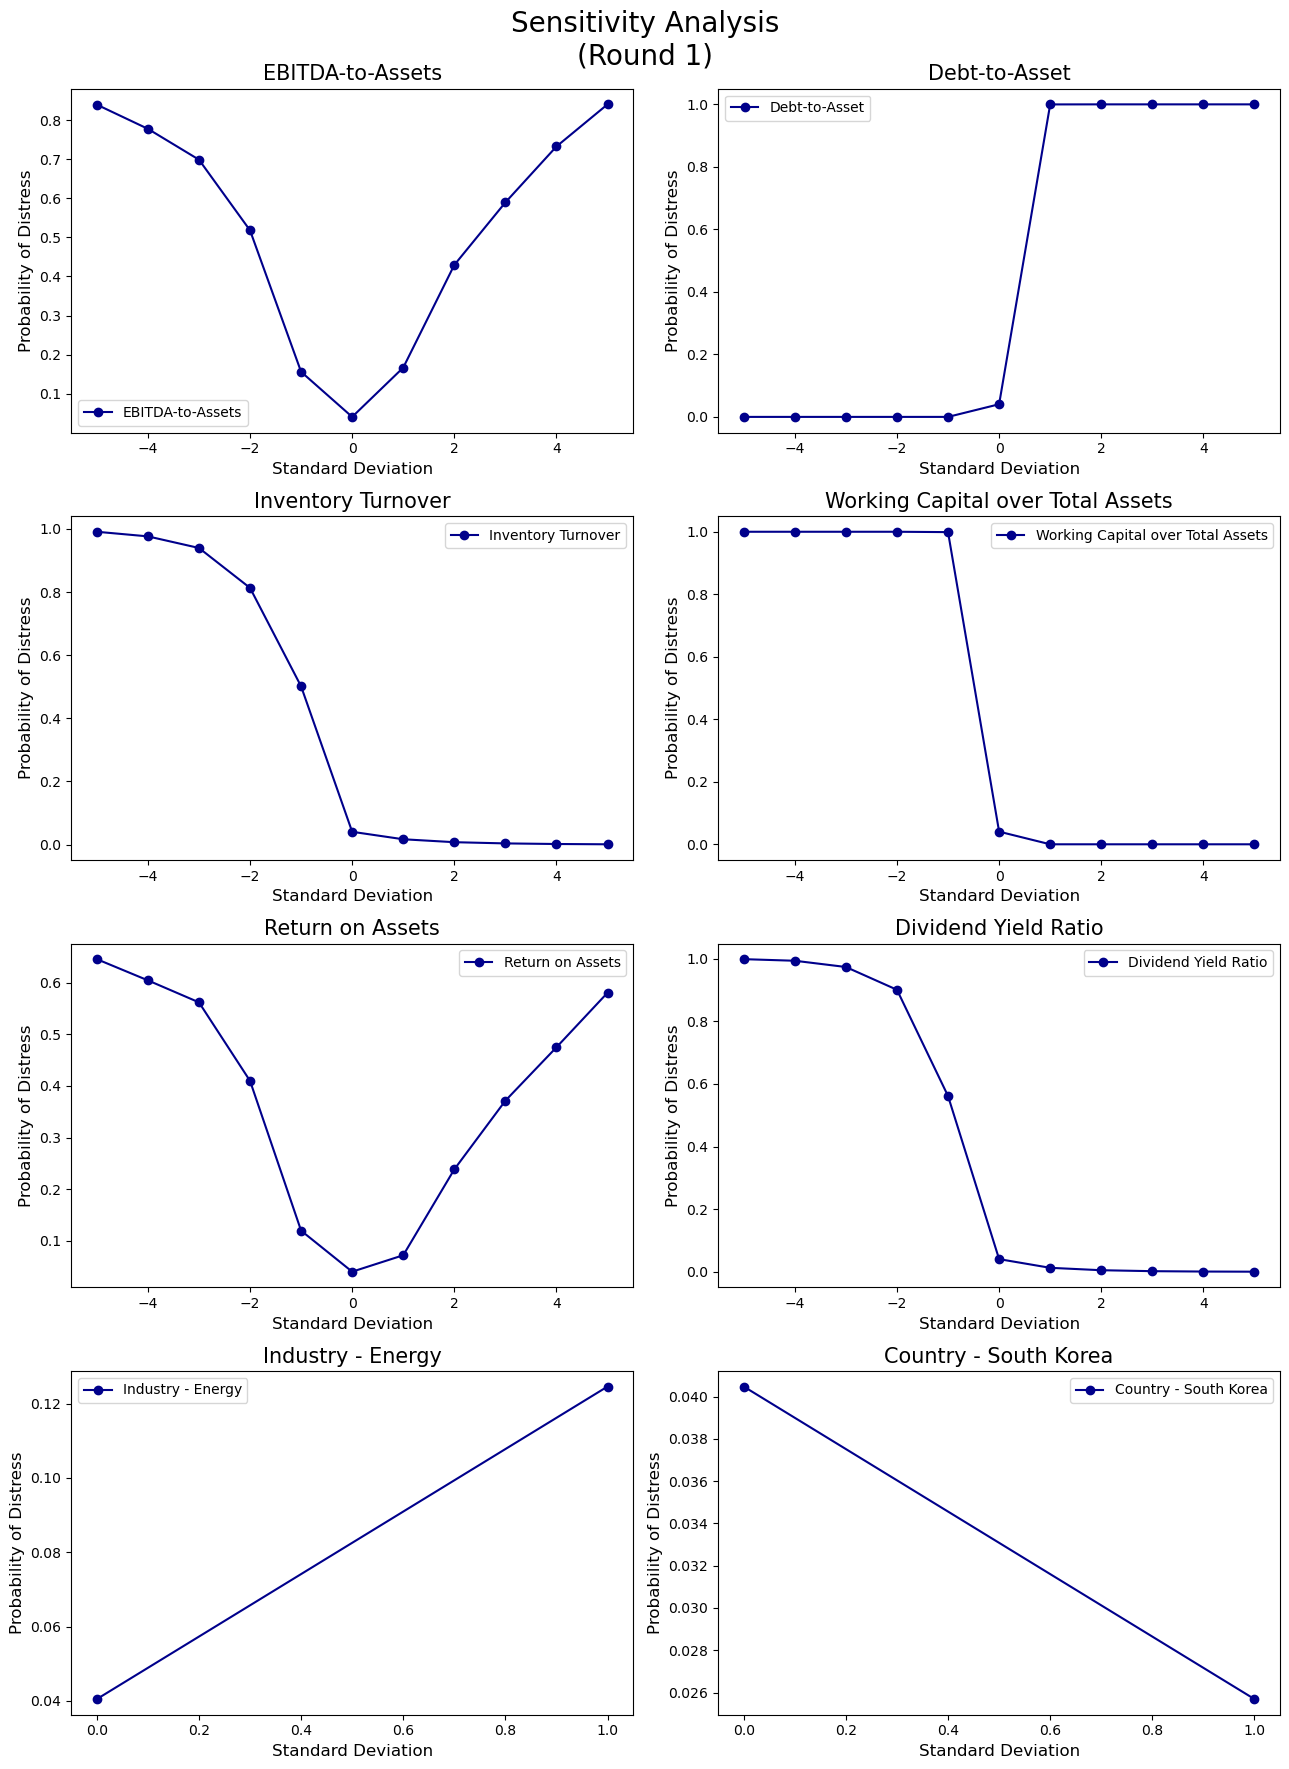

In [121]:
# Set Figure size
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(13,18))
fig.suptitle('Sensitivity Analysis\n(Round 1)', size = 20)

# Plot EBITDA-to-Assets subgraph
ax1.plot(sensitivityanalysis.columns, sensitivityanalysis.loc['ebitda_to_assets'], label = 'EBITDA-to-Assets',
         marker = 'o', color = 'darkblue')
# Formatting of subgraph
ax1.set_title('EBITDA-to-Assets', size = 15)
ax1.set_xlabel('Standard Deviation', size = 12)
ax1.set_ylabel('Probability of Distress', size = 12)
ax1.legend()


# Plot Debt-to-Asset subgraph
ax2.plot(sensitivityanalysis.columns, sensitivityanalysis.loc['debt_to_asset'], label = 'Debt-to-Asset',
         marker = 'o', color = 'darkblue')   
# Formatting of subgraph
ax2.set_title('Debt-to-Asset', size = 15)
ax2.set_xlabel('Standard Deviation', size = 12)
ax2.set_ylabel('Probability of Distress', size = 12)
ax2.legend()


# Plot Inventory Turnover subgraph
ax3.plot(sensitivityanalysis.columns, sensitivityanalysis.loc['inventory_turnover'], label = 'Inventory Turnover',
         marker = 'o', color = 'darkblue')
# Formatting of subgraph
ax3.set_title('Inventory Turnover', size = 15)
ax3.set_xlabel('Standard Deviation', size = 12)
ax3.set_ylabel('Probability of Distress', size = 12)
ax3.legend()


# Plot Working Capital over Total Assets subgraph
ax4.plot(sensitivityanalysis.columns, sensitivityanalysis.loc['working_capital_over_total_assets'], label = 'Working Capital over Total Assets',
         marker = 'o', color = 'darkblue')
# Formatting of subgraph
ax4.set_title('Working Capital over Total Assets', size = 15)
ax4.set_xlabel('Standard Deviation', size = 12)
ax4.set_ylabel('Probability of Distress', size = 12)
ax4.legend()


# Plot Return on Assets subgraph
ax5.plot(sensitivityanalysis.columns, sensitivityanalysis.loc['return_on_assets'], label = 'Return on Assets',
         marker = 'o', color = 'darkblue')
# Formatting of subgraph
ax5.set_title('Return on Assets', size = 15)
ax5.set_xlabel('Standard Deviation', size = 12)
ax5.set_ylabel('Probability of Distress', size = 12)
ax5.legend()


# Plot Dividend Yield Ratio subgraph
ax6.plot(sensitivityanalysis.columns, sensitivityanalysis.loc['dividend_yield_ratio'], label = 'Dividend Yield Ratio',
         marker = 'o', color = 'darkblue')
# Formatting of subgraph
ax6.set_title('Dividend Yield Ratio', size = 15)
ax6.set_xlabel('Standard Deviation', size = 12)
ax6.set_ylabel('Probability of Distress', size = 12)
ax6.legend()


# Plot Industry - Energy subgraph
ax7.plot(sensitivityanalysis.columns, sensitivityanalysis.loc['industry_energy'], label = 'Industry - Energy',
         marker = 'o', color = 'darkblue')
# Formatting of subgraph
ax7.set_title('Industry - Energy', size = 15)
ax7.set_xlabel('Standard Deviation', size = 12)
ax7.set_ylabel('Probability of Distress', size = 12)
ax7.legend()


# Plot Country - South Korea subgraph
ax8.plot(sensitivityanalysis.columns, sensitivityanalysis.loc['country_south_korea'], label = 'Country - South Korea',
         marker = 'o', color = 'darkblue')
# Formatting of subgraph
ax8.set_title('Country - South Korea', size = 15)
ax8.set_xlabel('Standard Deviation', size = 12)
ax8.set_ylabel('Probability of Distress', size = 12)
ax8.legend()

plt.tight_layout()
plt.savefig('./files/images/model_evaluation/sensitivity_start.png', bbox_inches='tight', dpi=300)
plt.show()

All features display the expected output (probability of distress) **with the exception of (1) EBITDA-to-Assets and (2) Return on Assets Ratio.**
Since EBITDA-to-Assets and Return on Assets illustrate a U-shaped output, this means that high values of EBITDA-to-Assets or Return on Assets can increase the probability of distress. This is illogical in the given context. 

Hence, we will remove those ratios in a **stepwise manner** (i.e., **we will first remove EBITDA-to-Assets Ratio**) from the Artificial Neural Network model to prevent it from erroneously influencing the output of the model. Subsequently, we will re-run the neural network to observe whether the removal of EBITDA-to-Assets affects the relationship between the remaining inputs and the target. 

If the outcome after the removal of EBITDA-to-Assets ratio still reveals a contradiction between the illustrated output of Return on Assets Ratio and our expected output, we will then omit the Return on Assets Ratio later.

In [122]:
# Remove 'EBITDA-to-Assets' ratio from the 8 selected features as it does not produce expected output
# X_train_final_cols
X_train_final_cols.remove('ebitda_to_assets')

In [123]:
# Redefine number of nodes in the input layer
n_features = X_train_final[X_train_final_cols].shape[1]
print(n_features) # 7 features

# Redefine X_train and X_test
X_train_final_ann = X_train_final[X_train_final_cols]
X_test_final_ann = X_test_final[X_train_final_cols]

7


In [124]:
# Re-run the neural network with the same parameters

def build_ann_adjusted():
    # Initialising ANN
    ann = Sequential()

    # Setting the number of nodes in hidden layer (i.e., average number of nodes in input and output layer)
    # Number of hidden neurons = (number of nodes in inputs + number of nodes in output)/2
    units = (n_features+1)/2
    units = np.ceil(units)

    # Add first layer with 8 nodes, ReLU activation function
    # 'kernel_initializer' is used to initialize the hidden Layer weights uniformly
    ann.add(Dense(name = 'h1', units = units, kernel_initializer = 'HeUniform', activation = 'relu', input_shape=(n_features,)))
    
    # Add second hidden layer with 4 nodes, ReLU activation function
    ann.add(Dense(name = 'h2', units = units, kernel_initializer = 'HeUniform', activation = 'relu'))
    
    # Add output layer with 1 node (which is target variable i.e., distress - the variable predicting), Sigmoid activation function
    # Sigmoid activation function is used because we want to predict the probability between 0 and 1 as an output
    ann.add(Dense(name = 'output', units = 1, kernel_initializer = 'HeUniform', activation = 'sigmoid'))

    # Compiling ANN
    # Optimizer is used to automatically compute the optimal weightage factor for each connector
    optimizer = keras.optimizers.Adam(lr=0.01) # Learning rate
    # Binary cross-entropy loss is used because we want to compare each of the predicted probabilities to the actual class output
    ann.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    # Early stopping callback (It stops training when there is no improvement in the validation loss for 10 consecutive epochs)  
    es = EarlyStopping(monitor = 'val_accuracy', mode = 'max', patience = 10, restore_best_weights = True)
    
    # Fitting ANN
    ann.fit(X_train_final_ann, y_train_final, callbacks=[es], batch_size = 32, epochs = 100, validation_split = 0.1, 
            shuffle = True, verbose = 0)

    # Save model results
    # ann.save('./files/ann_model_sensitivity_1.h5')
    
    # load a saved keras model/Return compiled model
    ann = load_model('./files/ann_saved_models/ann_model_sensitivity_1.h5')
    
    return ann

In [125]:
# Print summary
build_ann_adjusted().summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
h1 (Dense)                   (None, 4)                 32        
_________________________________________________________________
h2 (Dense)                   (None, 4)                 20        
_________________________________________________________________
output (Dense)               (None, 1)                 5         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [126]:
# Conduct second round of sensitivity analysis on remaining 7 features
# Vary one feature while keeping the other features constant

# Create a matrix with 7 numbers in each array (signify 7 features)
# Each array contains 6 zeros and 1 value that ranges from -5 to 5, where 0 represents the mean for the 6 elements and 
# -5 to 5 represents the standard deviation away from the mean

matrix = []

for index in range(0, 7):

    for std in range(-5,6):
        # Create a list of 7 zeros representing the mean of each feature
        list_of_values = [0]*7
        
        # At each iteration, replace one of the zeros with (-5 to 5)
        list_of_values[index] = std
        list_of_values = np.array([list_of_values])

        matrix.append(list_of_values)

In [127]:
# Check an array in the matrix
matrix[76]

array([[0, 0, 0, 0, 0, 0, 5]])

In [128]:
# Create a list to store predictions
y_predictions = []
ann_model = build_ann_adjusted()

# Use built model (ANN) to predict the probability of 2 classes
for i in range(0,len(matrix)):
    y_pred = ann_model.predict(matrix[i])
    y_predictions.append(y_pred[0][0])

In [129]:
# 77 predictions in list
len(y_predictions)

77

In [130]:
# Generate a list of zscores
zscore = list(range(-5, 6))

# Create a dataframe containing the predictions
sensitivityanalysis = pd.DataFrame(np.array_split(y_predictions, 7), columns = zscore, index = X_train_final_cols)

# Set specific cells for binary variables as NA
sensitivityanalysis.loc['industry_energy', -5:-1] = np.nan
sensitivityanalysis.loc['industry_energy', 2:5] = np.nan
sensitivityanalysis.loc['country_south_korea', -5:-1] = np.nan
sensitivityanalysis.loc['country_south_korea', 2:5] = np.nan

# Print dataframe
sensitivityanalysis.round(4)

-5      -4      -3      -2      -1  \
industry_energy                       NaN     NaN     NaN     NaN     NaN   
debt_to_asset                      0.0000  0.0000  0.0000  0.0000  0.0000   
inventory_turnover                 1.0000  1.0000  1.0000  0.9994  0.9898   
working_capital_over_total_assets  1.0000  0.9999  0.9994  0.9965  0.9806   
return_on_assets                   0.9303  0.9199  0.7516  0.4258  0.1482   
dividend_yield_ratio               0.8599  0.8599  0.8599  0.8083  0.3487   
country_south_korea                   NaN     NaN     NaN     NaN     NaN   

                                        0       1       2       3       4  \
industry_energy                    0.0391  0.0699     NaN     NaN     NaN   
debt_to_asset                      0.0391  0.9935  0.9999  1.0000  1.0000   
inventory_turnover                 0.0391  0.0000  0.0000  0.0000  0.0000   
working_capital_over_total_assets  0.0391  0.0000  0.0000  0.0000  0.0000   
return_on_assets                   0.0391  0.1474  0.2580  0.3381  0.4286   
dividend_yield_ratio               0.0391  0.0108  0.0035  0.0006  0.0001   
country_south_korea                0.0391  0.0343     NaN     NaN     NaN   

                                        5  
industry_energy                       NaN  
debt_to_asset                      1.0000  
inventory_turnover                 0.0000  
working_capital_over_total_assets  0.0000  
return_on_assets                   0.5187  
dividend_yield_ratio               0.0000  
country_south_korea                   NaN

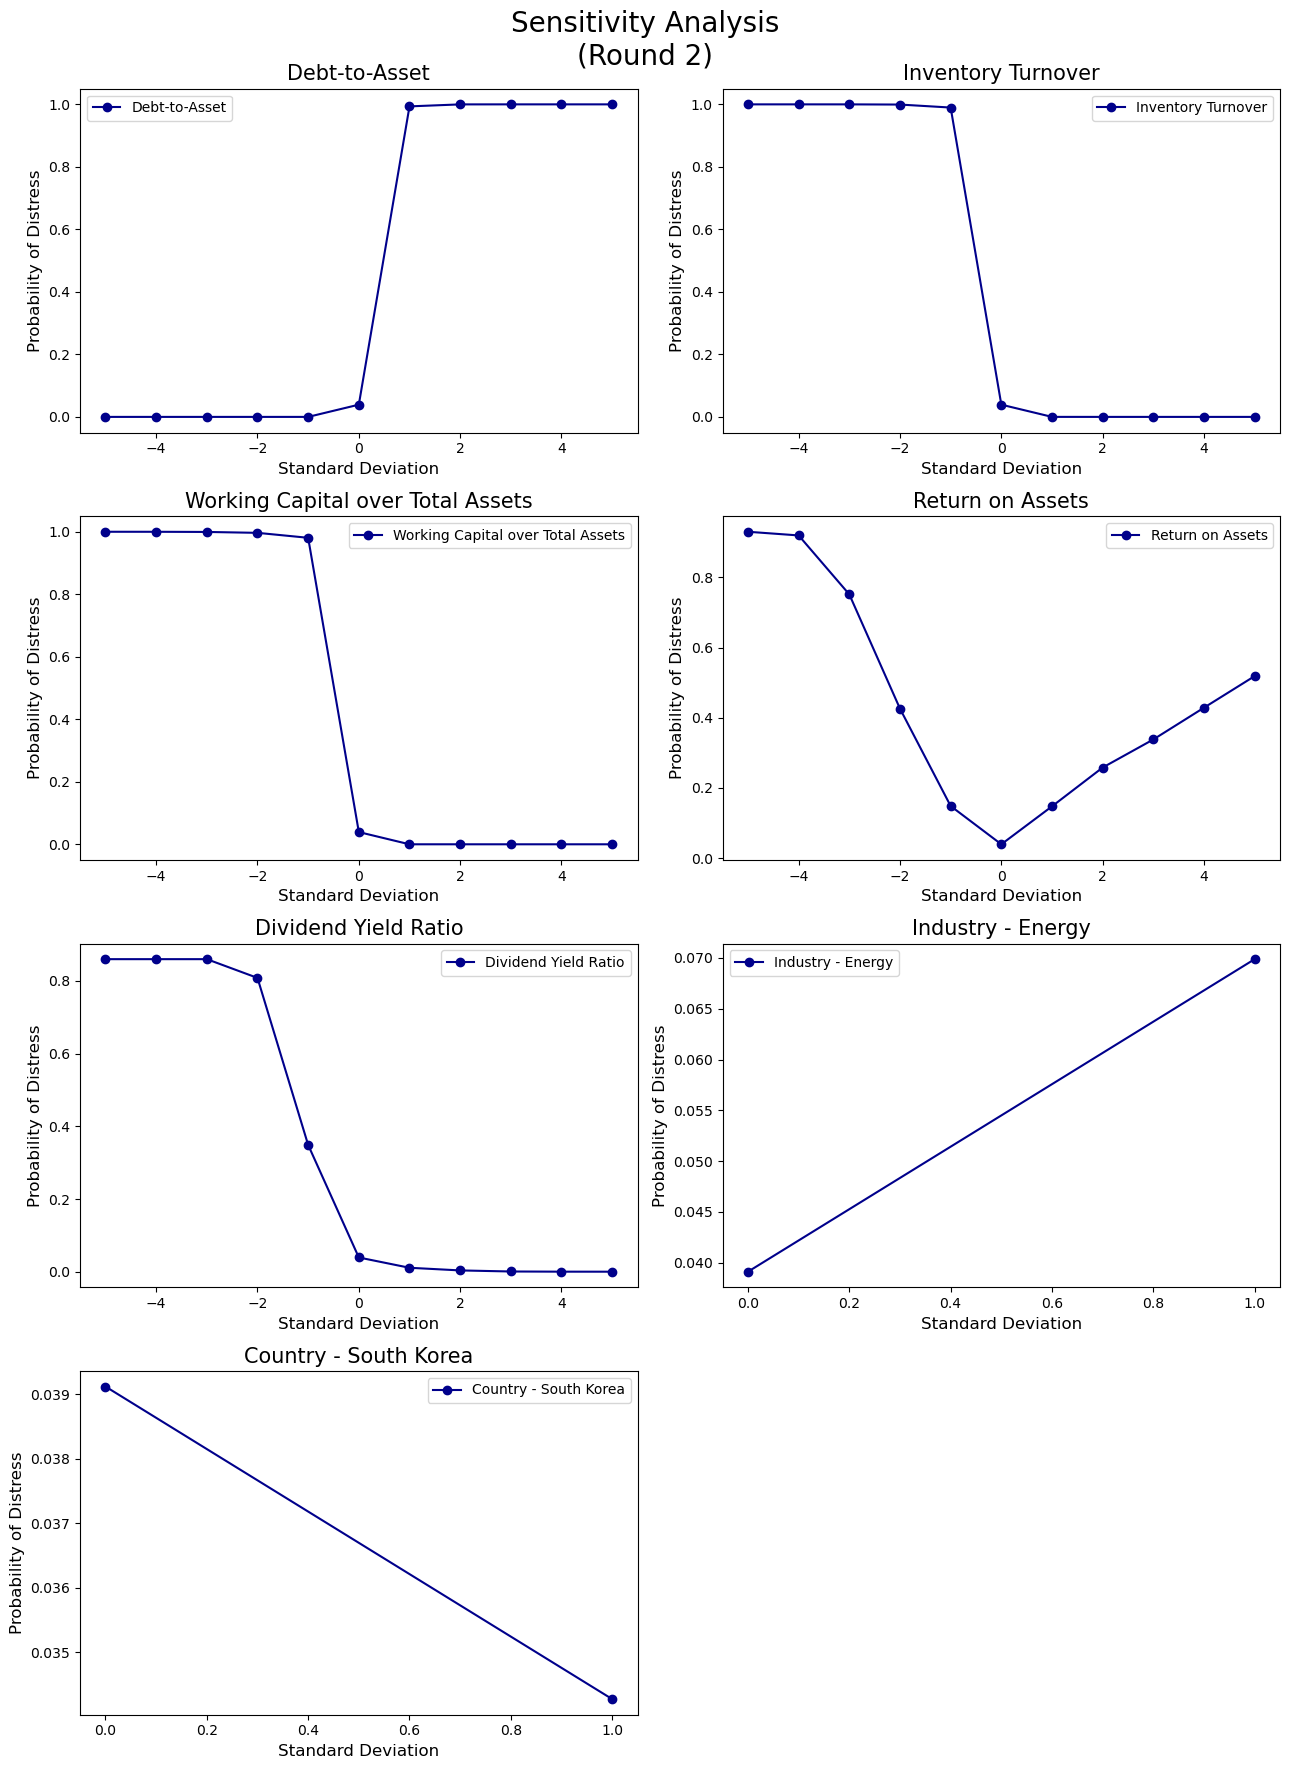

In [131]:
# Set Figure size
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(13,18))
fig.suptitle('Sensitivity Analysis\n(Round 2)', size = 20)

# Plot Debt-to-Asset subgraph
ax1.plot(sensitivityanalysis.columns, sensitivityanalysis.loc['debt_to_asset'], label = 'Debt-to-Asset',
         marker = 'o', color = 'darkblue')   
# Formatting of subgraph
ax1.set_title('Debt-to-Asset', size = 15)
ax1.set_xlabel('Standard Deviation', size = 12)
ax1.set_ylabel('Probability of Distress', size = 12)
ax1.legend()


# Plot Inventory Turnover subgraph
ax2.plot(sensitivityanalysis.columns, sensitivityanalysis.loc['inventory_turnover'], label = 'Inventory Turnover',
         marker = 'o', color = 'darkblue')
# Formatting of subgraph
ax2.set_title('Inventory Turnover', size = 15)
ax2.set_xlabel('Standard Deviation', size = 12)
ax2.set_ylabel('Probability of Distress', size = 12)
ax2.legend()


# Plot Working Capital over Total Assets subgraph
ax3.plot(sensitivityanalysis.columns, sensitivityanalysis.loc['working_capital_over_total_assets'], label = 'Working Capital over Total Assets',
         marker = 'o', color = 'darkblue')
# Formatting of subgraph
ax3.set_title('Working Capital over Total Assets', size = 15)
ax3.set_xlabel('Standard Deviation', size = 12)
ax3.set_ylabel('Probability of Distress', size = 12)
ax3.legend()


# Plot Return on Assets subgraph
ax4.plot(sensitivityanalysis.columns, sensitivityanalysis.loc['return_on_assets'], label = 'Return on Assets',
         marker = 'o', color = 'darkblue')
# Formatting of subgraph
ax4.set_title('Return on Assets', size = 15)
ax4.set_xlabel('Standard Deviation', size = 12)
ax4.set_ylabel('Probability of Distress', size = 12)
ax4.legend()


# Plot Dividend Yield Ratio subgraph
ax5.plot(sensitivityanalysis.columns, sensitivityanalysis.loc['dividend_yield_ratio'], label = 'Dividend Yield Ratio',
         marker = 'o', color = 'darkblue')
# Formatting of subgraph
ax5.set_title('Dividend Yield Ratio', size = 15)
ax5.set_xlabel('Standard Deviation', size = 12)
ax5.set_ylabel('Probability of Distress', size = 12)
ax5.legend()


# Plot Industry - Energy subgraph
ax6.plot(sensitivityanalysis.columns, sensitivityanalysis.loc['industry_energy'], label = 'Industry - Energy',
         marker = 'o', color = 'darkblue')
# Formatting of subgraph
ax6.set_title('Industry - Energy', size = 15)
ax6.set_xlabel('Standard Deviation', size = 12)
ax6.set_ylabel('Probability of Distress', size = 12)
ax6.legend()


# Plot Country - South Korea subgraph
ax7.plot(sensitivityanalysis.columns, sensitivityanalysis.loc['country_south_korea'], label = 'Country - South Korea',
         marker = 'o', color = 'darkblue')
# Formatting of subgraph
ax7.set_title('Country - South Korea', size = 15)
ax7.set_xlabel('Standard Deviation', size = 12)
ax7.set_ylabel('Probability of Distress', size = 12)
ax7.legend()

# Delete last plot
fig.delaxes(ax8)

plt.tight_layout()
plt.show()

Consistent with the findings from our first round of sensitivity analysis, we can observe that the Return on Assets Ratio graph displays a U-shaped output, which suggests that high values of Return on Assets can increase the probability of distress. This contradicts business intuition.

Hence, we will **remove Return on Assets Ratio** from the Artificial Neural Network model and re-run the model again to observe the relationship between the remaining inputs and the target.

In [132]:
# Remove 'Return on Assets' ratio from the 7 remaining features
# X_train_final_cols
X_train_final_cols.remove('return_on_assets')

In [133]:
# Redefine number of nodes in the input layer
n_features = X_train_final[X_train_final_cols].shape[1]
print(n_features) # 6 features

# Redefine X_train and X_test
X_train_final_ann = X_train_final[X_train_final_cols]
X_test_final_ann = X_test_final[X_train_final_cols]

6


In [134]:
# Re-run the neural network with the same parameters

def build_ann_adjusted():
    # Initialising ANN
    global ann # Global declaration of ann variable
    ann = Sequential()

    # Setting the number of nodes in hidden layer (i.e., average number of nodes in input and output layer)
    # Number of hidden neurons = (number of nodes in inputs + number of nodes in output)/2
    units = (n_features+1)/2
    units = np.ceil(units)

    # Add first layer with 8 nodes, ReLU activation function
    # 'kernel_initializer' is used to initialize the hidden Layer weights uniformly
    ann.add(Dense(name = 'h1', units = units, kernel_initializer = 'HeUniform', activation = 'relu', input_shape=(n_features,)))
    
    # Add second hidden layer with 4 nodes, ReLU activation function
    ann.add(Dense(name = 'h2', units = units, kernel_initializer = 'HeUniform', activation = 'relu'))
    
    # Add output layer with 1 node (which is target variable i.e., distress - the variable predicting), Sigmoid activation function
    # Sigmoid activation function is used because we want to predict the probability between 0 and 1 as an output
    ann.add(Dense(name = 'output', units = 1, kernel_initializer = 'HeUniform', activation = 'sigmoid'))

    # Compiling ANN
    # Optimizer is used to automatically compute the optimal weightage factor for each connector
    optimizer = keras.optimizers.Adam(lr=0.01) # Learning rate
    # Binary cross-entropy loss is used because we want to compare each of the predicted probabilities to the actual class output
    ann.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    # Early stopping callback (It stops training when there is no improvement in the validation loss for 10 consecutive epochs)  
    es = EarlyStopping(monitor = 'val_accuracy', mode = 'max', patience = 10, restore_best_weights = True)
    
    # Fitting ANN
    ann.fit(X_train_final_ann, y_train_final, callbacks=[es], batch_size = 32, epochs = 100, validation_split = 0.1, 
            shuffle = True, verbose = 0)

    # Save model results
    # ann.save('./files/ann_model_sensitivity_2.h5')
    
    # load a saved keras model/Return compiled model
    ann = load_model('./files/ann_saved_models/ann_model_sensitivity_2.h5')
    
    return ann

In [135]:
# Print summary
build_ann_adjusted().summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
h1 (Dense)                   (None, 4)                 28        
_________________________________________________________________
h2 (Dense)                   (None, 4)                 20        
_________________________________________________________________
output (Dense)               (None, 1)                 5         
Total params: 53
Trainable params: 53
Non-trainable params: 0
_________________________________________________________________


In [136]:
# Conduct third round of sensitivity analysis on remaining 6 features
# Vary one feature while keeping the other features constant

# Create a matrix with 6 numbers in each array (signify 6 features)
# Each array contains 5 zeros and 1 value that ranges from -5 to 5, where 0 represents the mean for the 5 elements and 
# -5 to 5 represents the standard deviation away from the mean

matrix = []

for index in range(0, 6):

    for std in range(-5,6):
        # Create a list of 7 zeros representing the mean of each feature
        list_of_values = [0]*6
        
        # At each iteration, replace one of the zeros with (-5 to 5)
        list_of_values[index] = std
        list_of_values = np.array([list_of_values])

        matrix.append(list_of_values)

In [137]:
# Check an array in the matrix
matrix[65]

array([[0, 0, 0, 0, 0, 5]])

In [138]:
# Create a list to store predictions
y_predictions = []
ann_model = build_ann_adjusted()

# Use built model (ANN) to predict the probability of 2 classes
for i in range(0,len(matrix)):
    y_pred = ann_model.predict(matrix[i])
    y_predictions.append(y_pred[0][0])

In [139]:
# 66 predictions in list
len(y_predictions)

66

In [140]:
# Generate a list of zscores
zscore = list(range(-5, 6))

# Create a dataframe containing the predictions
sensitivityanalysis = pd.DataFrame(np.array_split(y_predictions, 6), columns = zscore, index = X_train_final_cols)

# Set specific cells for binary variables as NA
sensitivityanalysis.loc['industry_energy', -5:-1] = np.nan
sensitivityanalysis.loc['industry_energy', 2:5] = np.nan
sensitivityanalysis.loc['country_south_korea', -5:-1] = np.nan
sensitivityanalysis.loc['country_south_korea', 2:5] = np.nan

# Print dataframe
sensitivityanalysis.round(4)

-5      -4      -3      -2      -1  \
industry_energy                       NaN     NaN     NaN     NaN     NaN   
debt_to_asset                      0.0000  0.0000  0.0000  0.0000  0.0000   
inventory_turnover                 0.9606  0.9378  0.9031  0.8521  0.7703   
working_capital_over_total_assets  0.6683  0.6690  0.6697  0.6703  0.6598   
dividend_yield_ratio               0.7358  0.7279  0.7198  0.7056  0.6635   
country_south_korea                   NaN     NaN     NaN     NaN     NaN   

                                        0       1       2       3       4  \
industry_energy                    0.0803  0.1457     NaN     NaN     NaN   
debt_to_asset                      0.0803  0.7682  0.8332  0.8827  0.9189   
inventory_turnover                 0.0803  0.0016  0.0000  0.0000  0.0000   
working_capital_over_total_assets  0.0803  0.0000  0.0000  0.0000  0.0000   
dividend_yield_ratio               0.0803  0.0144  0.0026  0.0004  0.0001   
country_south_korea                0.0803  0.0283     NaN     NaN     NaN   

                                        5  
industry_energy                       NaN  
debt_to_asset                      0.9447  
inventory_turnover                 0.0000  
working_capital_over_total_assets  0.0000  
dividend_yield_ratio               0.0000  
country_south_korea                   NaN

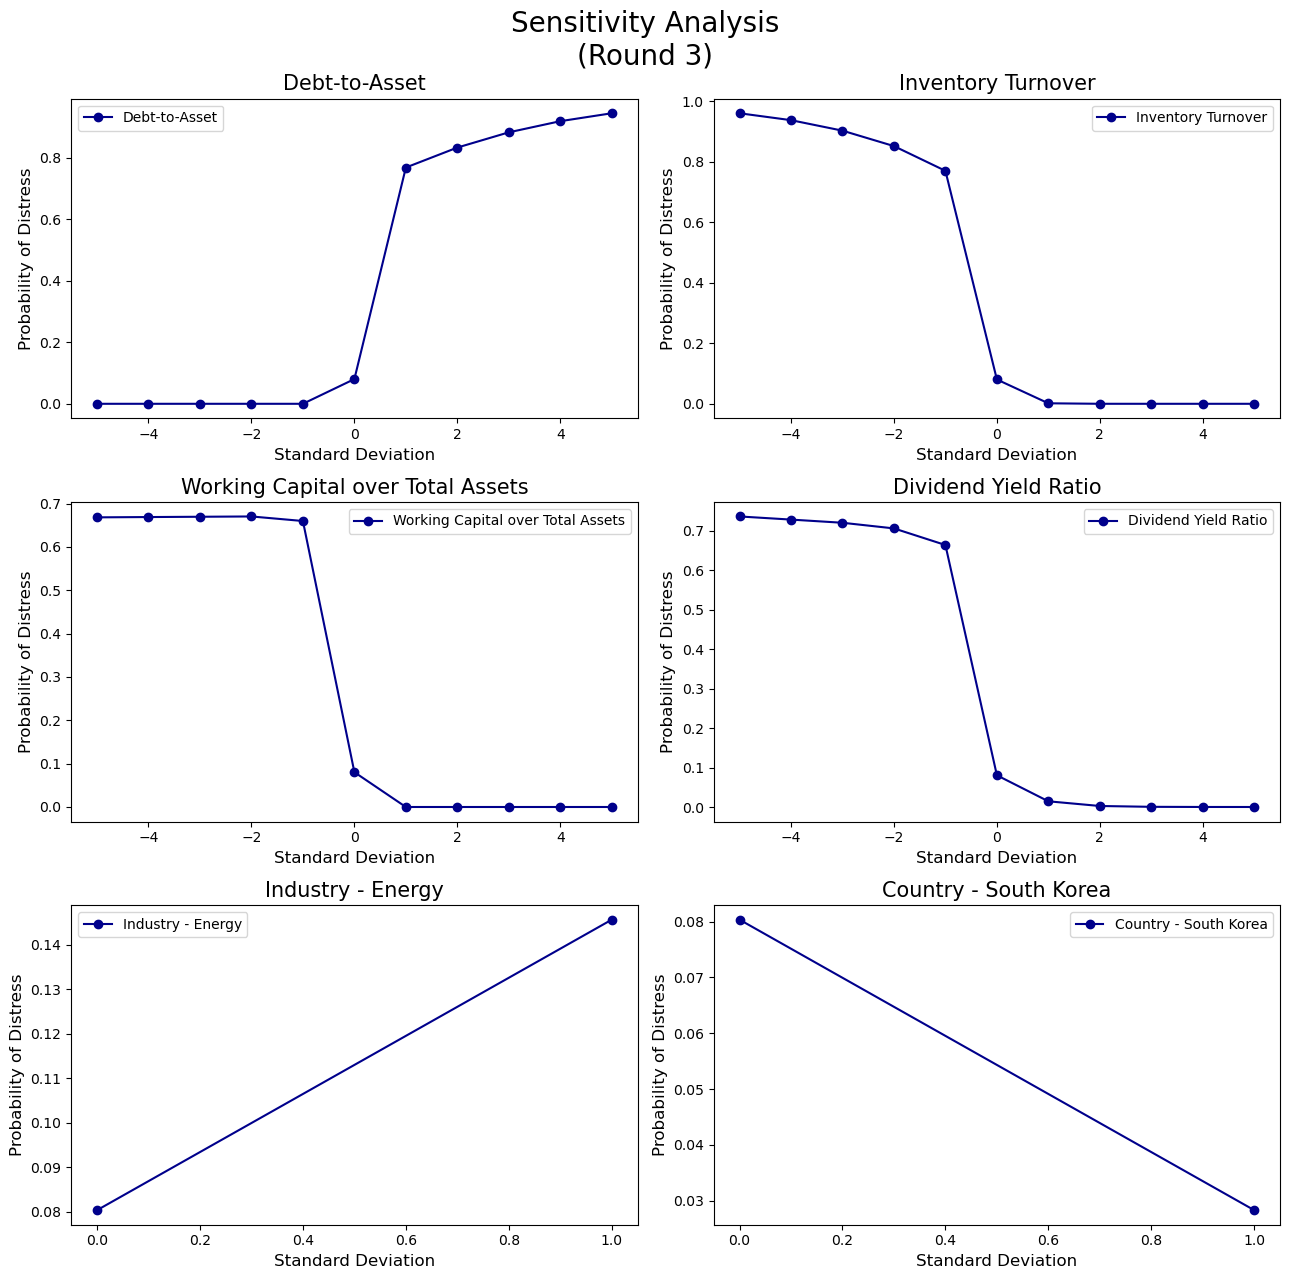

In [141]:
# Set Figure size
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(13,13))
fig.suptitle('Sensitivity Analysis\n(Round 3)', size = 20)

# Plot Debt-to-Asset subgraph
ax1.plot(sensitivityanalysis.columns, sensitivityanalysis.loc['debt_to_asset'], label = 'Debt-to-Asset',
         marker = 'o', color = 'darkblue')   
# Formatting of subgraph
ax1.set_title('Debt-to-Asset', size = 15)
ax1.set_xlabel('Standard Deviation', size = 12)
ax1.set_ylabel('Probability of Distress', size = 12)
ax1.legend()


# Plot Inventory Turnover subgraph
ax2.plot(sensitivityanalysis.columns, sensitivityanalysis.loc['inventory_turnover'], label = 'Inventory Turnover',
         marker = 'o', color = 'darkblue')
# Formatting of subgraph
ax2.set_title('Inventory Turnover', size = 15)
ax2.set_xlabel('Standard Deviation', size = 12)
ax2.set_ylabel('Probability of Distress', size = 12)
ax2.legend()


# Plot Working Capital over Total Assets subgraph
ax3.plot(sensitivityanalysis.columns, sensitivityanalysis.loc['working_capital_over_total_assets'], label = 'Working Capital over Total Assets',
         marker = 'o', color = 'darkblue')
# Formatting of subgraph
ax3.set_title('Working Capital over Total Assets', size = 15)
ax3.set_xlabel('Standard Deviation', size = 12)
ax3.set_ylabel('Probability of Distress', size = 12)
ax3.legend()


# Plot Dividend Yield Ratio subgraph
ax4.plot(sensitivityanalysis.columns, sensitivityanalysis.loc['dividend_yield_ratio'], label = 'Dividend Yield Ratio',
         marker = 'o', color = 'darkblue')
# Formatting of subgraph
ax4.set_title('Dividend Yield Ratio', size = 15)
ax4.set_xlabel('Standard Deviation', size = 12)
ax4.set_ylabel('Probability of Distress', size = 12)
ax4.legend()


# Plot Industry - Energy subgraph
ax5.plot(sensitivityanalysis.columns, sensitivityanalysis.loc['industry_energy'], label = 'Industry - Energy',
         marker = 'o', color = 'darkblue')
# Formatting of subgraph
ax5.set_title('Industry - Energy', size = 15)
ax5.set_xlabel('Standard Deviation', size = 12)
ax5.set_ylabel('Probability of Distress', size = 12)
ax5.legend()


# Plot Country - South Korea subgraph
ax6.plot(sensitivityanalysis.columns, sensitivityanalysis.loc['country_south_korea'], label = 'Country - South Korea',
         marker = 'o', color = 'darkblue')
# Formatting of subgraph
ax6.set_title('Country - South Korea', size = 15)
ax6.set_xlabel('Standard Deviation', size = 12)
ax6.set_ylabel('Probability of Distress', size = 12)
ax6.legend()

plt.tight_layout()
plt.savefig('./files/images/model_evaluation/sensitivity_final.png', bbox_inches='tight', dpi=300)
plt.show()

Since **all features display the anticipated output (probability of distress)**, we will establish the above 6 features as features reflective of distress and re-evaluate the performance of the Artificial Neural Network using the 6 features as inputs.

<h3> Artificial Neural Network Equation </h3>

In [142]:
# Convert ANN to Basic Formula

# Temporary list for each layer formula
formula_list = []

# Counter of hidden layers
f_n = 1

for i in range(len(ann.layers)):
    # Get ith Keras layer's weights and biases
    layer = ann.layers[i]
    W = layer.get_weights()
    # Empty text string for concatenating formula for ANN layers
    formula = ''

    # Formula for input layer
    if i == 0:
        for i in range(W[0].shape[1]):
            cur_weight = np.sum(W[0][0,i])
            cur_bias = np.sum(W[1][i])
            # Build formula for input layer
            formula += '*'+str(np.round(cur_weight,2))+'*'+'x+'+'*'+str(np.round(cur_bias,2)) + '*'+ '/'
        # Append input layer formula to temporary list
        formula_list.append(formula)

    # Formula for hidden layer
    elif i < len(ann.layers)-1:
        # Start loop for next layer each neuron
        for c in range(W[0].shape[1]):
            cur_bias = np.sum(W[1][c])
            for i in range(W[0].shape[0]):
                cur_weight = np.sum(W[0][i, c])
                # Build formula for hidden layer using previous layer (input) formula
                formula += '*'+str(np.round(cur_weight,2))+'*'+'f'+str(f_n)+'('+formula_list[-1].split('/')[i]+')'+'f'+str(f_n)+'+'
            formula += '*'+str(np.round(cur_bias,2))+'*' + '/'
        # Append hidden layer formula to temporary list
        formula_list.append(formula)
        # Increase index number for next hidden layer
        f_n+=1

    # Formula for output layer
    else:
        for i in range(W[0].shape[0]):
            cur_weight = np.sum(W[0][i, 0])
            # Build formula for output layer using previous layer (hidden) formula
            formula += '*'+str(np.round(cur_weight,2))+'*'+'f'+str(f_n)+'('+formula_list[-1].split('/')[i]+')'+'f'+str(f_n)+'+'
        cur_bias = np.sum(W[1][0])
        formula += '*'+str(np.round(cur_bias,2))+'*'
        # Append output layer formula to temporary list
        formula_list.append(formula)

# Get last formula
formula = formula_list[-1]

# Clean formula
formula = formula.replace('+*-','-')
formula = formula.replace('+*0.0*','')
formula = formula.replace('-*0.0*','')
formula = formula.replace('*','')
# print(formula)

In [143]:
import re

# Create numpy formula
def numpy_activation_function(x):
    return '(np.exp('+x+') - np.exp(-'+x+'))/(np.exp('+x+') + np.exp(-'+x+'))'

formula_numpy = formula
for i in range(1,f_n+1):
    exist = True
    while exist:
        try:
            pattern = 'f'+str(i)+'(.*?)'+'f'+str(i)
            substring = re.search(pattern, formula_numpy).group(1)
            start = re.search(pattern, formula_numpy).start()
            formula_numpy = formula_numpy[:start] + numpy_activation_function(substring) + formula_numpy[start + 4 + len(substring):]
        except:
            exist = False

formula_numpy = formula_numpy.replace('(np', '*(np')
formula_numpy = formula_numpy.replace('x-', '*x-')
formula_numpy = formula_numpy.replace('x+', '*x+')
formula_numpy = formula_numpy.replace('/*', '/')

print(formula_numpy)

0.57*(np.exp((-1.13*(np.exp((-0.11*x+0.53)) - np.exp(-(-0.11*x+0.53)))/(np.exp((-0.11*x+0.53)) + np.exp(-(-0.11*x+0.53)))+0.88*(np.exp((-0.38*x-0.24)) - np.exp(-(-0.38*x-0.24)))/(np.exp((-0.38*x-0.24)) + np.exp(-(-0.38*x-0.24)))-0.65*(np.exp((-0.03*x+0.21)) - np.exp(-(-0.03*x+0.21)))/(np.exp((-0.03*x+0.21)) + np.exp(-(-0.03*x+0.21)))+0.88*(np.exp((-0.17*x-0.02)) - np.exp(-(-0.17*x-0.02)))/(np.exp((-0.17*x-0.02)) + np.exp(-(-0.17*x-0.02)))-0.08)) - np.exp(-(-1.13*(np.exp((-0.11*x+0.53)) - np.exp(-(-0.11*x+0.53)))/(np.exp((-0.11*x+0.53)) + np.exp(-(-0.11*x+0.53)))+0.88*(np.exp((-0.38*x-0.24)) - np.exp(-(-0.38*x-0.24)))/(np.exp((-0.38*x-0.24)) + np.exp(-(-0.38*x-0.24)))-0.65*(np.exp((-0.03*x+0.21)) - np.exp(-(-0.03*x+0.21)))/(np.exp((-0.03*x+0.21)) + np.exp(-(-0.03*x+0.21)))+0.88*(np.exp((-0.17*x-0.02)) - np.exp(-(-0.17*x-0.02)))/(np.exp((-0.17*x-0.02)) + np.exp(-(-0.17*x-0.02)))-0.08)))/(np.exp((-1.13*(np.exp((-0.11*x+0.53)) - np.exp(-(-0.11*x+0.53)))/(np.exp((-0.11*x+0.53)) + np.exp(-(-

In [144]:
# Train accuracy
ann_train_loss, ann_train_acc = build_ann_adjusted().evaluate(X_train_final_ann, y_train_final, verbose=0)
print('Train Accuracy: {:.2f}'.format(round(ann_train_acc,2)))

Train Accuracy: 0.86


In [145]:
# Performing 10-fold cross-validation to assess stability of trained model
ann_classifier = KerasClassifier(build_fn = build_ann_adjusted, verbose=0, shuffle = True) # Wrap the model

ann_acc = cross_val_score(ann_classifier, X_train_final_ann, y_train_final,
                          cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42), scoring='accuracy')

print("Mean accuracy score of {:.2f} with a standard deviation of {:.2f}".format(ann_acc.mean(), ann_acc.std()))
print('')
print('Accuracy scores for 10-fold cross-validation:')
print(ann_acc)

Mean accuracy score of 0.86 with a standard deviation of 0.01

Accuracy scores for 10-fold cross-validation:
[0.86241276 0.85429142 0.86626747 0.85728543 0.85628743 0.85329341
 0.86327345 0.83932136 0.87225549 0.84630739]


It is observed that:
- Mean accuracy score derived from 10-fold cross-validation (0.86) is approximately the same as the training accuracy (0.86)
- Standard deviation of the 10-fold cross-validation is low (0.01)

This implies that the **Artificial Neural Network model (after sensitivity analysis) produces stable results and is around 86% accurate** in distinguishing between distress and non-distress SMEs

<h3> Model Evaluation - Artificial Neural Network (After Sensitivity Analysis) </h3>

In [146]:
# Use built model to predict the probability of 2 classes on test set
y_pred_ann = build_ann_adjusted().predict(X_test_final_ann)

# Set threshold value
threshold = 0.3

# Classification based on defined threshold
y_pred_ann = (y_pred_ann > threshold)

In [147]:
# Print classification report
print(classification_report(y_test_final, y_pred_ann))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      3328
           1       0.28      0.69      0.40       193

    accuracy                           0.88      3521
   macro avg       0.63      0.79      0.67      3521
weighted avg       0.94      0.88      0.91      3521



- Test Accuracy: 0.88

Confusion Matrix:
[[2983  345]
 [  60  133]]


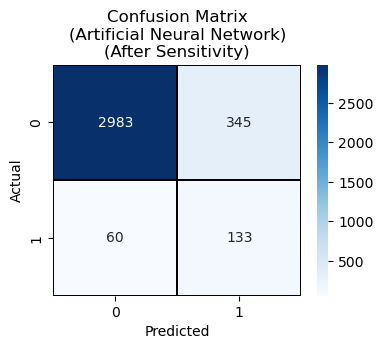

In [148]:
# Confusion Matrix
print('Confusion Matrix:')

# Compute confusion matrix
cf_matrix_ann = confusion_matrix(y_test_final, y_pred_ann)
print(cf_matrix_ann)

# Visualise confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cf_matrix_ann, annot=True, fmt='d', cmap='Blues', linewidths=0.01, linecolor='k')

# Graph formatting 
plt.title('Accuracy Score:{}'.format(round((accuracy_score(y_test_final, y_pred_ann.round())),3)))
plt.title('Confusion Matrix\n(Artificial Neural Network)\n(After Sensitivity)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig('./files/images/model_evaluation/cf_matrix_ann_aftsensitivity.png', bbox_inches='tight', dpi=300)
plt.show()

In [149]:
# Define True Negative, False Positive, False Negative, and True Positive
tn, fp, fn, tp = cf_matrix_ann.ravel()

print('Performance of Artificial Neural Network on test set:')
print('----------------------------------------------------------')

# Accuracy Score
accuracyrate_ann_aftsensitivity = accuracy_score(y_test_final, y_pred_ann)
print('Overall Accuracy Rate: {:.2f}%\n'.format(accuracyrate_ann_aftsensitivity*100))

# Specificity
specificity_ann_aftsensitivity = tn/(tn+fp)
print('Specificity: {:.2f}%'.format(specificity_ann_aftsensitivity*100))

# Type I Error
typeierror_ann_aftsensitivity = fp/(tn+fp)
print('Type I Error: {:.2f}%'.format(typeierror_ann_aftsensitivity*100))

# Sensitivity
sensitivity_ann_aftsensitivity = tp/(tp+fn)
print('Sensitivity: {:.2f}%'.format(sensitivity_ann_aftsensitivity*100))

# Type II Error
typeiierror_ann_aftsensitivity = fn/(tp+fn)
print('Type II Error: {:.2f}%'.format(typeiierror_ann_aftsensitivity*100))
print('')

# Area Under Curve (AUC)
auc_ann_aftsensitivity = roc_auc_score(y_test_final, y_pred_ann)
print('Area Under Curve (AUC):', round(auc_ann_aftsensitivity, 2))

Performance of Artificial Neural Network on test set:
----------------------------------------------------------
Overall Accuracy Rate: 88.50%

Specificity: 89.63%
Type I Error: 10.37%
Sensitivity: 68.91%
Type II Error: 31.09%

Area Under Curve (AUC): 0.79


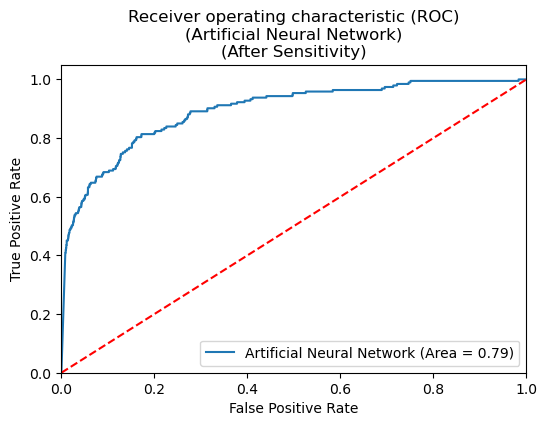

In [150]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_final, build_ann_adjusted().predict(X_test_final_ann))
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label='Artificial Neural Network (Area = %0.2f)' % auc_ann_aftsensitivity)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)\n(Artificial Neural Network)\n(After Sensitivity)')
plt.legend(loc="lower right")

plt.savefig('./files/images/model_evaluation/roc_ann_aftsensitivity.png', bbox_inches='tight', dpi=300)
plt.show()

<br>

<br>

# Step 11: Comparing Model Performances

In [151]:
# Adding performance metrics into list
logreg_list = [accuracyrate_logreg, specificity_logreg, typeierror_logreg, sensitivity_logreg, 
               typeiierror_logreg, round(auc_logreg,2)]

dt_list = [accuracyrate_dt, specificity_dt, typeierror_dt, sensitivity_dt, typeiierror_dt, round(auc_dt,2)]

ann_list_befsensitivity = [accuracyrate_ann_befsensitivity, specificity_ann_befsensitivity, typeierror_ann_befsensitivity, 
                           sensitivity_ann_befsensitivity, typeiierror_ann_befsensitivity, round(auc_ann_befsensitivity,2)]

ann_list_aftsensitivity = [accuracyrate_ann_aftsensitivity, specificity_ann_aftsensitivity, typeierror_ann_aftsensitivity, 
                        sensitivity_ann_aftsensitivity, typeiierror_ann_aftsensitivity, round(auc_ann_aftsensitivity,2)]

In [152]:
# Formatting elements in list
logreg_list = [str(round(i*100, 2))+'%' for i in logreg_list[:-1]] + logreg_list[-1:]
dt_list = [str(round(i*100, 2))+'%' for i in dt_list[:-1]] + dt_list[-1:]
ann_list_befsensitivity = [str(round(i*100, 2))+'%' for i in ann_list_befsensitivity[:-1]] + ann_list_befsensitivity[-1:]
ann_list_aftsensitivity = [str(round(i*100, 2))+'%' for i in ann_list_aftsensitivity[:-1]] + ann_list_aftsensitivity[-1:]

In [153]:
# Creating a dataframe for performance metrics
modelperf = pd.DataFrame([logreg_list, dt_list, ann_list_befsensitivity, ann_list_aftsensitivity], 
                         columns=['Overall Accuracy', 'Specificity', 'Type I Error', 'Sensitivity', ' Type II Error', 'AUC'], 
                         index=['Logistic Regression', 'Decision Tree (CART)', 
                                'Artificial Neural Network (Before Sensitivity)', 
                                'Artificial Neural Network (After Sensitivity)'])

In [154]:
# Print dataframe
modelperf

Overall Accuracy Specificity  \
Logistic Regression                                      88.19%      88.91%   
Decision Tree (CART)                                     86.48%       87.2%   
Artificial Neural Network (Before Sensitivity)           86.54%      86.78%   
Artificial Neural Network (After Sensitivity)             88.5%      89.63%   

                                               Type I Error Sensitivity  \
Logistic Regression                                  11.09%      75.65%   
Decision Tree (CART)                                  12.8%      74.09%   
Artificial Neural Network (Before Sensitivity)       13.22%      82.38%   
Artificial Neural Network (After Sensitivity)        10.37%      68.91%   

                                                Type II Error   AUC  
Logistic Regression                                    24.35%  0.82  
Decision Tree (CART)                                   25.91%  0.81  
Artificial Neural Network (Before Sensitivity)         17.62%  0.85  
Artificial Neural Network (After Sensitivity)          31.09%  0.79

From the table, we can observe:
- **All three models performed reasonably well.**
- The Artificial Neural Network (Before Sensitivity) has the highest AUC value (0.85). But after removing incoherent features through sensitivity analysis, the AUC value for Artificial Neural Network dropped to 0.79, rendering Logistic Regression and Decision Tree as better models. This leaves us to choose the best model between Logistic Regression and Decision Tree.

&nbsp;

- When comparing between Logistic Regression and Decision Tree, we conclude that **Logistic Regression is the superior model.** Logistic Regression is preferred over Decision Tree because it collectively possesses a **higher AUC value (0.82), with higher overall accuracy rate (88.19%), specificity (88.91%), and sensitivity (75.65%) compared to Decision Tree. Its type I (11.09%) and type II (24.35%) errors are also lower.**